In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# Load the data
data = pd.read_csv('/Users/niyatipatel/Desktop/SPG/Sem 6/Data1.csv')


In [46]:
data.head(15)

,ID No.,Name of Student,DAA,OS,PMR,R_PROG,Failed,High Scorer
0,22AIML001,BAMBHROLIYA OM PRAFULBHAI,15.0,12.0,19,21,False,False
1,22AIML002,BARAI AUM DHIRENBHAI,21.5,7.5,24,28,True,False
2,22AIML003,BHANUSHALI HARSH ASHVINBHAI,16.5,18.0,21,25,False,False
3,22AIML004,BHANUSHALI JANVI DEEPAK,20.5,23.5,21,25,False,False
4,22AIML005,BHOJANI ISHITABEN RAJESHBHAI,19.5,20.0,20,28,False,False
5,22AIML006,BORDA AKSHATKUMAR MAHESHBHAI,0.0,0.0,0,0,True,False
6,22AIML007,DEVARSHI DAVE,20.0,14.0,0,27,True,False
7,22AIML008,DESAI KESHA MIRALBHAI,17.5,13.0,22,20,False,False
8,22AIML009,DOBARIYA ZULI JAYSHUKHBHAI,19.0,19.5,21,26,False,False
9,22AIML010,DUDHAGARA DARSHAN BHARATBHAI,9.0,7.5,10,19,True,False


In [9]:
data.columns = data.columns.str.strip()

In [10]:

# Compute average marks for each subject
average_marks = data[['DAA', 'OS', 'PMR', 'R_PROG']].mean()
print("Average marks for each subject:\n", average_marks)


Average marks for each subject:
 DAA       18.367925
OS        16.650943
PMR       20.660377
R_PROG    24.547170
dtype: float64


In [11]:

# Identify students who failed in any subject (less than 12 marks)
data['Failed'] = data[['DAA', 'OS', 'PMR', 'R_PROG']].min(axis=1) < 12
failed_students = data[data['Failed']]
print("\nStudents who failed in any subject:\n", failed_students[['ID No.', 'Name of Student']])



Students who failed in any subject:
        ID No.                        Name of Student
1   22AIML002                  BARAI AUM DHIRENBHAI 
5   22AIML006          BORDA AKSHATKUMAR MAHESHBHAI 
6   22AIML007                         DEVARSHI DAVE 
9   22AIML010          DUDHAGARA DARSHAN BHARATBHAI 
11  22AIML012           GAJERA YASH DHARMENDRAKUMAR 
15  22AIML016  KACHHADIYA DARSHITKUMAR SHAILESHBHAI 
25  22AIML026          PAGHDAR YAGNIK RAJNIKANTBHAI 
49  22AIML050                SHAH VATSAL NILESHBHAI 


In [13]:

# Identify students who scored greater than 80% in all subjects
data['High Scorer'] = data[['DAA', 'OS', 'PMR', 'R_PROG']].min(axis=1) > 24
high_scorers = data[data['High Scorer']]
print("\nStudents who scored greater than 80% in all subjects:\n", high_scorers[['ID No.', 'Name of Student']])



Students who scored greater than 80% in all subjects:
        ID No.    Name of Student
48  22AIML049  SHAH SNEH TUSHAR 


Text(0, 0.5, 'Marks')

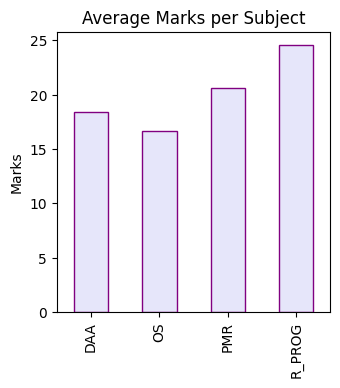

In [25]:

# 1. Bar Chart: Average marks across subjects
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
average_marks.plot(kind='bar', color='lavender', edgecolor='purple')
plt.title('Average Marks per Subject')
plt.ylabel('Marks')


Text(0.5, 0, 'Marks')

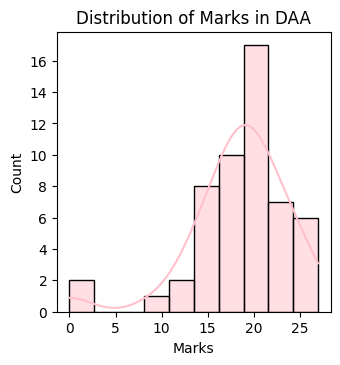

In [27]:

# 2. Histogram: Distribution of marks for DAA
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 2)
sns.histplot(data['DAA'], kde=True, bins=10, color='pink')
plt.title('Distribution of Marks in DAA')
plt.xlabel('Marks')


Text(0.5, 1.0, 'Radar Chart for Student')

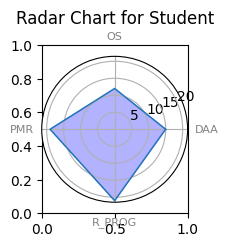

In [18]:

# 4. Radar Chart for a specific student
from math import pi
plt.subplot(2, 3, 4)
student_index = 0  # First student
data_for_radar = data.iloc[student_index][['DAA', 'OS', 'PMR', 'R_PROG']]
categories = list(data_for_radar.index)
n_categories = len(categories)
angles = [n / float(n_categories) * 2 * pi for n in range(n_categories)]
angles += angles[:1]
values = data_for_radar.values.flatten().tolist()
values += values[:1]
ax = plt.subplot(2, 3, 4, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, color='blue', alpha=0.3)
plt.title('Radar Chart for Student')


ValueError: Unknown format code 'd' for object of type 'float'

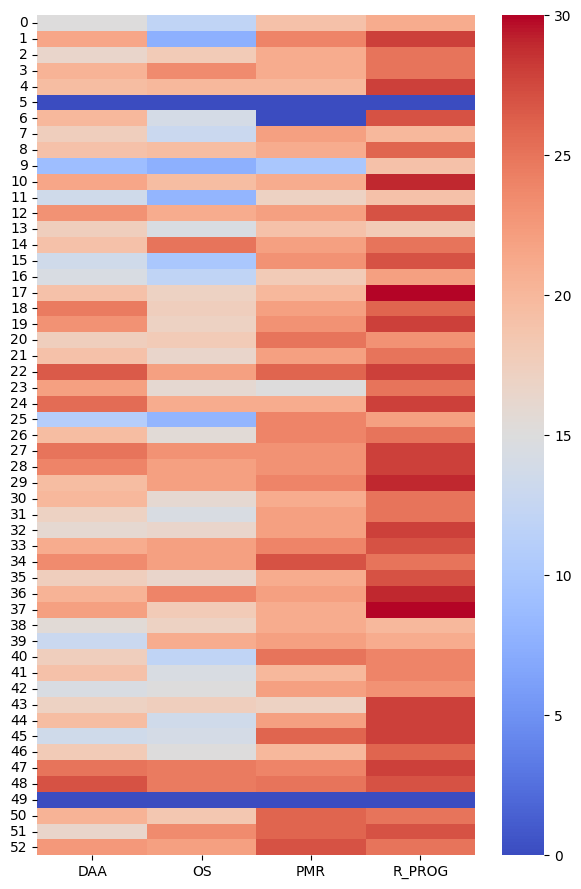

In [23]:

# 5. Heatmap: Class-level insights
plt.figure(figsize=(24, 24))
plt.subplot(2, 3, 5)
sns.heatmap(data[['DAA', 'OS', 'PMR', 'R_PROG']], annot=True, fmt="d", cmap='coolwarm')
plt.title('Class Performance Heatmap')


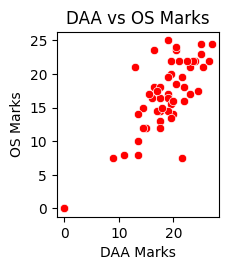

In [20]:

# 6. Scatter Plot: Correlation between DAA and OS
plt.subplot(2, 3, 6)
sns.scatterplot(x=data['DAA'], y=data['OS'], color='red')
plt.title('DAA vs OS Marks')
plt.xlabel('DAA Marks')
plt.ylabel('OS Marks')

plt.tight_layout()
plt.show()


# New

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:

def analyze_student_performance(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Calculate subject percentages
    subject_columns = ['DAA', 'OS', 'PMR', 'R_PROG']
    max_marks = 30
    
    for subject in subject_columns:
        df[f'{subject}_percentage'] = (df[subject] / max_marks) * 100
    
    # Calculate overall percentage
    df['Overall_percentage'] = df[subject_columns].mean(axis=1)
    
    # Generate insights
    insights = {
        'subject_averages': {},
        'top_performers': {},
        'failed_students': {},
        'above_70_percent': {}
    }
    
    # 1. Subject-wise Analysis
    for subject in subject_columns:
        insights['subject_averages'][subject] = {
            'average': df[subject].mean(),
            'highest_score': df[subject].max(),
            'lowest_score': df[subject].min(),
            'topper': df.loc[df[subject].idxmax(), 'Name of Student'],
        }
    
    # 2. Failed Students (less than 40%)
    failed_students = {}
    for subject in subject_columns:
        failed_in_subject = df[df[f'{subject}_percentage'] < 40]['Name of Student'].tolist()
        if failed_in_subject:
            failed_students[subject] = failed_in_subject
    insights['failed_students'] = failed_students
    
    # 3. Students scoring above 70%
    high_performers = {}
    for subject in subject_columns:
        high_performers_subject = df[df[f'{subject}_percentage'] >= 70]['Name of Student'].tolist()
        if high_performers_subject:
            high_performers[subject] = high_performers_subject
    insights['above_70_percent'] = high_performers
    
    # 4. Overall top performers (top 5)
    top_5_overall = df.nlargest(5, 'Overall_percentage')[['Name of Student', 'Overall_percentage']]
    insights['top_performers']['overall'] = top_5_overall.to_dict('records')
    
    # Generate visualizations
    plt.style.use('seaborn')
    
    # 1. Subject-wise Average Performance
    plt.figure(figsize=(12, 6))
    avg_scores = df[subject_columns].mean()
    avg_scores.plot(kind='bar')
    plt.title('Average Scores by Subject')
    plt.xlabel('Subjects')
    plt.ylabel('Average Score')
    plt.tight_layout()
    plt.savefig('subject_averages.png')
    plt.close()
    
    # 2. Performance Distribution
    plt.figure(figsize=(15, 5))
    for i, subject in enumerate(subject_columns, 1):
        plt.subplot(1, 4, i)
        sns.histplot(df[subject], bins=10)
        plt.title(f'{subject} Distribution')
    plt.tight_layout()
    plt.savefig('score_distribution.png')
    plt.close()
    
    # 3. Box Plot for Score Ranges
    plt.figure(figsize=(10, 6))
    df[subject_columns].boxplot()
    plt.title('Score Ranges by Subject')
    plt.ylabel('Scores')
    plt.tight_layout()
    plt.savefig('score_ranges.png')
    plt.close()
    
    # 4. Heatmap of correlations
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[subject_columns].corr(), annot=True, cmap='coolwarm')
    plt.title('Subject Correlation Heatmap')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    plt.close()
    
    return insights

def print_insights(insights):
    print("\n=== STUDENT PERFORMANCE ANALYSIS ===\n")
    
    print("1. SUBJECT-WISE AVERAGES:")
    for subject, data in insights['subject_averages'].items():
        print(f"\n{subject}:")
        print(f"  Average Score: {data['average']:.2f}")
        print(f"  Highest Score: {data['highest_score']}")
        print(f"  Lowest Score: {data['lowest_score']}")
        print(f"  Topper: {data['topper']}")
    
    print("\n2. FAILED STUDENTS (Below 40%):")
    for subject, students in insights['failed_students'].items():
        print(f"\n{subject}:")
        for student in students:
            print(f"  - {student}")
    
    print("\n3. HIGH PERFORMERS (Above 70%):")
    for subject, students in insights['above_70_percent'].items():
        print(f"\n{subject}:")
        for student in students:
            print(f"  - {student}")
    
    print("\n4. TOP 5 OVERALL PERFORMERS:")
    for i, student in enumerate(insights['top_performers']['overall'], 1):
        print(f"{i}. {student['Name of Student']} - {student['Overall_percentage']:.2f}%")

# Example usage
if __name__ == "__main__":
    insights = analyze_student_performance('Data1.csv')
    print_insights(insights)

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

# Error fixing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
max_marks = 30

def analyze_student_performance(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Calculate subject percentages
    subject_columns = ['DAA', 'OS', 'PMR', 'R_PROG']
    
    for subject in subject_columns:
        df[f'{subject}_percentage'] = (df[subject] / max_marks) * 100
    
    # Calculate overall percentage
    # df['Overall_percentage'] = ((df['DAA']+df['OS']+df['PMR']+df['R_PROG'])/120) *100
    df['Overall_percentage'] = df[subject_columns].mean(axis=1)
    
    # Generate insights
    insights = {
        'subject_averages': {},
        'top_performers': {},
        'failed_students': {},
        'above_70_percent': {}
    }
    
    # 1. Subject-wise Analysis
    for subject in subject_columns:
        insights['subject_averages'][subject] = {
            'average': df[subject].mean(),
            'highest_score': df[subject].max(),
            'lowest_score': df[subject].min(),
            'topper': df.loc[df[subject].idxmax(), 'Name of Student'],
        }
    
    # 2. Failed Students (less than 30%)
    failed_students = {}
    for subject in subject_columns:
        failed_in_subject = df[df[f'{subject}_percentage'] < 30]['Name of Student'].tolist()
        if failed_in_subject:
            failed_students[subject] = failed_in_subject
    insights['failed_students'] = failed_students
    
    # 3. Students scoring above 70%
    high_performers = {}
    for subject in subject_columns:
        high_performers_subject = df[df[f'{subject}_percentage'] >= 80]['Name of Student'].tolist()
        if high_performers_subject:
            high_performers[subject] = high_performers_subject
    insights['above_70_percent'] = high_performers
    
    # 4. Overall top performers (top 10)
    top_5_overall = df.nlargest(10, 'Overall_percentage')[['Name of Student', 'Overall_percentage']]
    insights['top_performers']['overall'] = top_5_overall.to_dict('records')
    
    # Generate visualizations
    plt.style.use('default')
    
    # 1. Subject-wise Average Performance
    plt.figure(figsize=(12, 6))
    avg_scores = df[subject_columns].mean()
    x = range(len(subject_columns))
    plt.bar(x, avg_scores, color='skyblue')
    plt.xticks(x, subject_columns, rotation=45)
    plt.title('Average Scores by Subject')
    plt.xlabel('Subjects')
    plt.ylabel('Average Score')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('subject_averages.png')
    plt.close()
    
    # 2. Performance Distribution
    plt.figure(figsize=(15, 5))
    for i, subject in enumerate(subject_columns, 1):
        plt.subplot(1, 4, i)
        plt.hist(df[subject], bins=10, color='lightblue', edgecolor='black')
        plt.title(f'{subject} Distribution')
        plt.xlabel('Scores')
        plt.ylabel('Frequency')
        plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('score_distribution.png')
    plt.close()
    
    # 3. Box Plot for Score Ranges
    plt.figure(figsize=(10, 6))
    plt.boxplot([df[subject] for subject in subject_columns], labels=subject_columns)
    plt.title('Score Ranges by Subject')
    plt.ylabel('Scores')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('score_ranges.png')
    plt.close()
    
    # 4. Correlation Plot
    plt.figure(figsize=(8, 6))
    corr_matrix = df[subject_columns].corr()
    im = plt.imshow(corr_matrix, cmap='coolwarm')
    plt.colorbar(im)
    plt.xticks(range(len(subject_columns)), subject_columns, rotation=45)
    plt.yticks(range(len(subject_columns)), subject_columns)
    
    # Add correlation values as text
    for i in range(len(subject_columns)):
        for j in range(len(subject_columns)):
            text = plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                          ha='center', va='center', color='black')
    
    plt.title('Subject Correlation Matrix')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png')
    plt.close()
    
    return insights

def print_insights(insights):
    print("\n=== STUDENT PERFORMANCE ANALYSIS ===\n")
    
    print("1. SUBJECT-WISE AVERAGES:")
    for subject, data in insights['subject_averages'].items():
        print(f"\n{subject}:")
        print(f"  Average Score: {data['average']:.2f}")
        print(f"  Highest Score: {data['highest_score']}")
        print(f"  Lowest Score: {data['lowest_score']}")
        print(f"  Topper: {data['topper']}")
    
    print("\n2. FAILED STUDENTS (Below 30%):")
    for subject, students in insights['failed_students'].items():
        print(f"\n{subject}:")
        for student in students:
            print(f"  - {student}")
    
    print("\n3. HIGH PERFORMERS (Above 80%):")
    for subject, students in insights['above_70_percent'].items():
        print(f"\n{subject}:")
        for student in students:
            print(f"  - {student}")
    
    print("\n4. TOP 10 OVERALL PERFORMERS:")
    for i, student in enumerate(insights['top_performers']['overall'], 1):
        print(f"{i}. {student['Name of Student']} - {((student['Overall_percentage']/max_marks)*100):.2f}%")

# Example usage
if __name__ == "__main__":
    insights = analyze_student_performance('Data1.csv')
    print_insights(insights)


=== STUDENT PERFORMANCE ANALYSIS ===

1. SUBJECT-WISE AVERAGES:

DAA:
  Average Score: 18.37
  Highest Score: 27.0
  Lowest Score: 0.0
  Topper: SHAH SNEH TUSHAR 

OS:
  Average Score: 16.65
  Highest Score: 25.0
  Lowest Score: 0.0
  Topper: JAYSWAL SHIVAM HITESH 

PMR:
  Average Score: 20.66
  Highest Score: 27
  Lowest Score: 0
  Topper: JANVI KIRTIKUMAR PATEL 

R_PROG:
  Average Score: 24.55
  Highest Score: 30
  Lowest Score: 0
  Topper: KUNVARIYA UMESHKUMAR SHAILESHBHAI 

2. FAILED STUDENTS (Below 30%):

DAA:
  - BORDA AKSHATKUMAR MAHESHBHAI 
  - SHAH VATSAL NILESHBHAI 

OS:
  - BARAI AUM DHIRENBHAI 
  - BORDA AKSHATKUMAR MAHESHBHAI 
  - DUDHAGARA DARSHAN BHARATBHAI 
  - GAJERA YASH DHARMENDRAKUMAR 
  - PAGHDAR YAGNIK RAJNIKANTBHAI 
  - SHAH VATSAL NILESHBHAI 

PMR:
  - BORDA AKSHATKUMAR MAHESHBHAI 
  - DEVARSHI DAVE 
  - SHAH VATSAL NILESHBHAI 

R_PROG:
  - BORDA AKSHATKUMAR MAHESHBHAI 
  - SHAH VATSAL NILESHBHAI 

3. HIGH PERFORMERS (Above 80%):

DAA:
  - MAHESHWARI HARSH DINE

# Intaractive Graphs

In [14]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
max_marks = 30

def analyze_student_performance(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Calculate subject percentages
    subject_columns = ['DAA', 'OS', 'PMR', 'R_PROG']
    
    for subject in subject_columns:
        df[f'{subject}_percentage'] = (df[subject] / max_marks) * 100
    
    # Calculate overall percentage
    df['Overall_percentage'] = df[subject_columns].mean(axis=1)
    
    # Generate insights
    insights = {
        'subject_averages': {},
        'top_performers': {},
        'failed_students': {},
        'above_80_percent': {},
        'failure_counts': {}  # New: Count of failures per subject
    }
    
    # 1. Subject-wise Analysis
    for subject in subject_columns:
        insights['subject_averages'][subject] = {
            'average': df[subject].mean(),
            'highest_score': df[subject].max(),
            'lowest_score': df[subject].min(),
            'topper': df.loc[df[subject].idxmax(), 'Name of Student'],
        }
    
    # 2. Failed Students (less than 40%) with marks
    failed_students = {}
    failure_counts = {}
    for subject in subject_columns:
        failed_df = df[df[f'{subject}_percentage'] < 40][['Name of Student', subject]]
        failed_students[subject] = failed_df.to_dict('records')
        failure_counts[subject] = len(failed_df)
    insights['failed_students'] = failed_students
    insights['failure_counts'] = failure_counts
    
    # 3. Students scoring above 80%
    high_performers = {}
    for subject in subject_columns:
        high_performers_subject = df[df[f'{subject}_percentage'] >= 80]['Name of Student'].tolist()
        if high_performers_subject:
            high_performers[subject] = high_performers_subject
    insights['above_80_percent'] = high_performers
    
    # 4. Overall top performers (top 5)
    top_5_overall = df.nlargest(5, 'Overall_percentage')[['Name of Student', 'Overall_percentage']]
    insights['top_performers']['overall'] = top_5_overall.to_dict('records')
    
    # Generate interactive visualizations
    
    # 1. Subject-wise Average Performance
    fig1 = px.bar(
        x=subject_columns,
        y=[df[subject].mean() for subject in subject_columns],
        title='Average Scores by Subject',
        labels={'x': 'Scores', 'y': 'Frequency'},
        color=subject_columns
    )
    fig1.write_html('subject_averages.html')
    
    # 2. Performance Distribution
    fig2 = make_subplots(rows=1, cols=4, subplot_titles=subject_columns)
    for i, subject in enumerate(subject_columns, 1):
        fig2.add_trace(
            go.Histogram(x=df[subject], name=subject),
            row=1, col=i
        )
    fig2.update_layout(title='Score Distribution by Subject',
                      showlegend=False,
                      height=500,
    )
    fig2.write_html('score_distribution.html')
    
    # 3. Box Plot for Score Ranges
    fig3 = go.Figure()
    for subject in subject_columns:
        fig3.add_trace(
            go.Box(y=df[subject], name=subject)
        )
    fig3.update_layout(title='Score Ranges by Subject')
    fig3.write_html('score_ranges.html')
    
    # 4. Correlation Heatmap
    corr_matrix = df[subject_columns].corr()
    fig4 = px.imshow(
        corr_matrix,
        labels=dict(color="Correlation"),
        title='Subject Correlation Matrix'
    )
    fig4.write_html('correlation_matrix.html')
    
    return insights, df

def print_insights(insights):
    print("\n=== STUDENT PERFORMANCE ANALYSIS ===\n")
    
    print("1. SUBJECT-WISE AVERAGES:")
    for subject, data in insights['subject_averages'].items():
        print(f"\n{subject}:")
        print(f"  Average Score: {data['average']:.2f}")
        print(f"  Highest Score: {data['highest_score']}")
        print(f"  Lowest Score: {data['lowest_score']}")
        print(f"  Topper: {data['topper']}")
    
    print("\n2. FAILED STUDENTS (Below 40%):")
    for subject, students in insights['failed_students'].items():
        print(f"\n{subject} - Failed Students: {insights['failure_counts'][subject]}")
        for student in students:
            print(f"  - {student['Name of Student']} (Marks: {student[subject]})")
    
    print("\n3. HIGH PERFORMERS (Above 80%):")
    for subject, students in insights['above_80_percent'].items():
        print(f"\n{subject}:")
        for student in students:
            print(f"  - {student}")
    
    print("\n4. TOP 5 OVERALL PERFORMERS:")
    for i, student in enumerate(insights['top_performers']['overall'], 1):
        print(f"{i}. {student['Name of Student']} - {((student['Overall_percentage']/max_marks)*100):.2f}%")

# Example usage
if __name__ == "__main__":
    insights, df = analyze_student_performance('Data1.csv')
    print_insights(insights)


=== STUDENT PERFORMANCE ANALYSIS ===

1. SUBJECT-WISE AVERAGES:

DAA:
  Average Score: 18.37
  Highest Score: 27.0
  Lowest Score: 0.0
  Topper: SHAH SNEH TUSHAR 

OS:
  Average Score: 16.65
  Highest Score: 25.0
  Lowest Score: 0.0
  Topper: JAYSWAL SHIVAM HITESH 

PMR:
  Average Score: 20.66
  Highest Score: 27
  Lowest Score: 0
  Topper: JANVI KIRTIKUMAR PATEL 

R_PROG:
  Average Score: 24.55
  Highest Score: 30
  Lowest Score: 0
  Topper: KUNVARIYA UMESHKUMAR SHAILESHBHAI 

2. FAILED STUDENTS (Below 40%):

DAA - Failed Students: 4
  - BORDA AKSHATKUMAR MAHESHBHAI  (Marks: 0.0)
  - DUDHAGARA DARSHAN BHARATBHAI  (Marks: 9.0)
  - PAGHDAR YAGNIK RAJNIKANTBHAI  (Marks: 11.0)
  - SHAH VATSAL NILESHBHAI  (Marks: 0.0)

OS - Failed Students: 7
  - BARAI AUM DHIRENBHAI  (Marks: 7.5)
  - BORDA AKSHATKUMAR MAHESHBHAI  (Marks: 0.0)
  - DUDHAGARA DARSHAN BHARATBHAI  (Marks: 7.5)
  - GAJERA YASH DHARMENDRAKUMAR  (Marks: 8.0)
  - KACHHADIYA DARSHITKUMAR SHAILESHBHAI  (Marks: 10.0)
  - PAGHDAR YAG

# Flexible Code

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_subject_columns(df):
    """Identify subject columns by excluding non-subject columns"""
    non_subject_columns = ['ID No.', 'Name of Student', 'Overall_percentage']
    return [col for col in df.columns if col not in non_subject_columns and not col.endswith('_percentage')]

def analyze_student_performance(csv_file, max_marks=None):
    """
    Analyze student performance from a CSV file
    Args:
        csv_file: Path to CSV file
        max_marks: Maximum marks per subject (if None, will prompt user)
    """
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Get subject columns dynamically
    subject_columns = get_subject_columns(df)
    
    # Get max marks from user if not provided
    if max_marks is None:
        max_marks = float(input("Enter maximum marks per subject: "))
    
    print(f"\nAnalyzing performance for subjects: {', '.join(subject_columns)}")
    print(f"Maximum marks per subject: {max_marks}")
    
    # Calculate subject percentages
    for subject in subject_columns:
        df[f'{subject}_percentage'] = (df[subject] / max_marks) * 100
    
    # Calculate overall percentage
    df['Overall_percentage'] = (df[subject_columns].mean(axis=1) / max_marks) * 100
    
    # Generate insights
    insights = {
        'subject_averages': {},
        'top_performers': {},
        'failed_students': {},
        'above_70_percent': {},
        'failure_counts': {}
    }
    
    # 1. Subject-wise Analysis
    for subject in subject_columns:
        insights['subject_averages'][subject] = {
            'average': df[subject].mean(),
            'highest_score': df[subject].max(),
            'lowest_score': df[subject].min(),
            'topper': df.loc[df[subject].idxmax(), 'Name of Student'],
        }
    
    # 2. Failed Students (less than 40%) with marks
    failed_students = {}
    failure_counts = {}
    for subject in subject_columns:
        failed_df = df[df[f'{subject}_percentage'] < 40][['Name of Student', subject]]
        failed_students[subject] = failed_df.to_dict('records')
        failure_counts[subject] = len(failed_df)
    insights['failed_students'] = failed_students
    insights['failure_counts'] = failure_counts
    
    # 3. Students scoring above 70%
    high_performers = {}
    for subject in subject_columns:
        high_performers_subject = df[df[f'{subject}_percentage'] >= 70]['Name of Student'].tolist()
        if high_performers_subject:
            high_performers[subject] = high_performers_subject
    insights['above_70_percent'] = high_performers
    
    # 4. Overall top performers (top 5)
    top_5_overall = df.nlargest(5, 'Overall_percentage')[['Name of Student', 'Overall_percentage']]
    insights['top_performers']['overall'] = top_5_overall.to_dict('records')
    
    # Generate interactive visualizations
    
    # 1. Subject-wise Average Performance
    fig1 = px.bar(
        x=subject_columns,
        y=[df[subject].mean() for subject in subject_columns],
        title='Average Scores by Subject',
        labels={'x': 'Subjects', 'y': 'Average Score'},
        color=subject_columns
    )
    fig1.write_html('subject_averages.html')
    
    # 2. Performance Distribution
    fig2 = make_subplots(
        rows=1, 
        cols=len(subject_columns), 
        subplot_titles=subject_columns
    )
    
    for i, subject in enumerate(subject_columns, 1):
        fig2.add_trace(
            go.Histogram(
                x=df[subject], 
                name=subject,
                nbinsx=10,
                hovertemplate="Score Range: %{x}<br>Count: %{y}<extra></extra>"
            ),
            row=1, col=i
        )
        
        # Update axes labels for each subplot
        fig2.update_xaxes(title_text="Scores", row=1, col=i)
        fig2.update_yaxes(title_text="Frequency" if i == 1 else None, row=1, col=i)
    
    fig2.update_layout(
        title='Score Distribution by Subject',
        showlegend=False,
        height=500,
        hovermode='x'
    )
    fig2.write_html('score_distribution.html')
    
    # 3. Box Plot for Score Ranges
    fig3 = go.Figure()
    for subject in subject_columns:
        fig3.add_trace(
            go.Box(
                y=df[subject], 
                name=subject,
                hovertemplate="<br>".join([
                    "Subject: %{x}",
                    "Score: %{y}",
                    "Q1: %{q1}",
                    "Median: %{median}",
                    "Q3: %{q3}",
                    "<extra></extra>"
                ])
            )
        )
    fig3.update_layout(
        title='Score Ranges by Subject',
        yaxis_title='Scores'
    )
    fig3.write_html('score_ranges.html')
    
    # 4. Correlation Heatmap
    corr_matrix = df[subject_columns].corr()
    fig4 = go.Figure(data=go.Heatmap(
        z=corr_matrix,
        x=subject_columns,
        y=subject_columns,
        colorscale='Blues',
        text=corr_matrix.round(2),
        texttemplate='%{text}',
        textfont={"size": 12},
        hoverongaps=False,
        hovertemplate="Subject 1: %{x}<br>Subject 2: %{y}<br>Correlation: %{z:.2f}<extra></extra>"
    ))
    
    fig4.update_layout(
        title='Subject Correlation Matrix',
        xaxis_title='Subjects',
        yaxis_title='Subjects',
        width=800,
        height=800
    )
    
    fig4.write_html('correlation_matrix.html')

def print_insights(insights):
    print("\n=== STUDENT PERFORMANCE ANALYSIS ===\n")
    
    print("1. SUBJECT-WISE AVERAGES:")
    for subject, data in insights['subject_averages'].items():
        print(f"\n{subject}:")
        print(f"  Average Score: {data['average']:.2f}")
        print(f"  Highest Score: {data['highest_score']}")
        print(f"  Lowest Score: {data['lowest_score']}")
        print(f"  Topper: {data['topper']}")
    
    print("\n2. FAILED STUDENTS (Below 40%):")
    for subject, students in insights['failed_students'].items():
        print(f"\n{subject} - Failed Students: {insights['failure_counts'][subject]}")
        for student in students:
            print(f"  - {student['Name of Student']} (Marks: {student[subject]})")
    
    print("\n3. HIGH PERFORMERS (Above 70%):")
    for subject, students in insights['above_70_percent'].items():
        print(f"\n{subject}:")
        for student in students:
            print(f"  - {student}")
    
    print("\n4. TOP 5 OVERALL PERFORMERS:")
    for i, student in enumerate(insights['top_performers']['overall'], 1):
        print(f"{i}. {student['Name of Student']} - {student['Overall_percentage']:.2f}%")

def main():
    # Get input from user
    csv_file = input("Enter the path to your CSV file: ")
    max_marks = float(input("Enter maximum marks per subject: "))
    
    try:
        insights, df = analyze_student_performance(csv_file, max_marks)
        print_insights(insights)
        print("\nVisualization files have been generated:")
        print("- subject_averages.html")
        print("- score_distribution.html")
        print("- score_ranges.html")
        print("- correlation_matrix.html")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()


Analyzing performance for subjects: DAA, OS, PMR, R_PROG
Maximum marks per subject: 30.0
An error occurred: cannot unpack non-iterable NoneType object


In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_subject_columns(df):
    """Identify subject columns by excluding non-subject columns"""
    non_subject_columns = ['ID No.', 'Name of Student', 'Overall_percentage']
    return [col for col in df.columns if col not in non_subject_columns and not col.endswith('_percentage')]

def analyze_student_performance(csv_file, max_marks=None):
    """
    Analyze student performance from a CSV file
    Args:
        csv_file: Path to CSV file
        max_marks: Maximum marks per subject (if None, will prompt user)
    Returns:
        insights: A dictionary containing analysis results
        df: The DataFrame with calculated percentages
    """
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Get subject columns dynamically
    subject_columns = get_subject_columns(df)
    
    # Get max marks from user if not provided
    if max_marks is None:
        max_marks = float(input("Enter maximum marks per subject: "))
    
    print(f"\nAnalyzing performance for subjects: {', '.join(subject_columns)}")
    print(f"Maximum marks per subject: {max_marks}")
    
    # Calculate subject percentages
    for subject in subject_columns:
        df[f'{subject}_percentage'] = (df[subject] / max_marks) * 100
    
    # Calculate overall percentage
    df['Overall_percentage'] = (df[subject_columns].mean(axis=1) / max_marks) * 100
    
    # Generate insights
    insights = {
        'subject_averages': {},
        'top_performers': {},
        'failed_students': {},
        'above_70_percent': {},
        'failure_counts': {}
    }
    
    # 1. Subject-wise Analysis
    for subject in subject_columns:
        insights['subject_averages'][subject] = {
            'average': df[subject].mean(),
            'highest_score': df[subject].max(),
            'lowest_score': df[subject].min(),
            'topper': df.loc[df[subject].idxmax(), 'Name of Student'],
        }
    
    # 2. Failed Students (less than 40%) with marks
    failed_students = {}
    failure_counts = {}
    for subject in subject_columns:
        failed_df = df[df[f'{subject}_percentage'] < 40][['Name of Student', subject]]
        failed_students[subject] = failed_df.to_dict('records')
        failure_counts[subject] = len(failed_df)
    
    insights['failed_students'] = failed_students
    insights['failure_counts'] = failure_counts
    
    # 3. Students scoring above 70%
    high_performers = {}
    for subject in subject_columns:
        high_performers_subject = df[df[f'{subject}_percentage'] >= 70]['Name of Student'].tolist()
        if high_performers_subject:
            high_performers[subject] = high_performers_subject
            
    insights['above_70_percent'] = high_performers
    
    # 4. Overall top performers (top 5)
    top_5_overall = df.nlargest(5, 'Overall_percentage')[['Name of Student', 'Overall_percentage']]
    insights['top_performers']['overall'] = top_5_overall.to_dict('records')
    
    # Visualizations omitted for brevity...

    return insights, df  # Return insights and DataFrame

def print_insights(insights):
    print("\n=== STUDENT PERFORMANCE ANALYSIS ===\n")
    
    print("1. SUBJECT-WISE AVERAGES:")
    for subject, data in insights['subject_averages'].items():
        print(f"\n{subject}:")
        print(f"  Average Score: {data['average']:.2f}")
        print(f"  Highest Score: {data['highest_score']}")
        print(f"  Lowest Score: {data['lowest_score']}")
        print(f"  Topper: {data['topper']}")
    
    print("\n2. FAILED STUDENTS (Below 40%):")
    for subject, students in insights['failed_students'].items():
        print(f"\n{subject} - Failed Students: {insights['failure_counts'][subject]}")
        for student in students:
            print(f"  - {student['Name of Student']} (Marks: {student[subject]})")
    
    print("\n3. HIGH PERFORMERS (Above 70%):")
    for subject, students in insights['above_70_percent'].items():
        print(f"\n{subject}:")
        for student in students:
            print(f"  - {student}")
    
    print("\n4. TOP 5 OVERALL PERFORMERS:")
    for i, student in enumerate(insights['top_performers']['overall'], 1):
        print(f"{i}. {student['Name of Student']} - {student['Overall_percentage']:.2f}%")

def main():
    # Get input from user
    csv_file = input("Enter the path to your CSV file: ")
    
    try:
        max_marks = float(input("Enter maximum marks per subject: "))
        
        insights, df = analyze_student_performance(csv_file, max_marks)  # Now this will work correctly.
        
        print_insights(insights)
        
        print("\nVisualization files have been generated:")
        print("- subject_averages.html")
        print("- score_distribution.html")
        print("- score_ranges.html")
        print("- correlation_matrix.html")
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()



Analyzing performance for subjects: DAA, OS, PMR, R_PROG, DBMS
Maximum marks per subject: 30.0

=== STUDENT PERFORMANCE ANALYSIS ===

1. SUBJECT-WISE AVERAGES:

DAA:
  Average Score: 18.37
  Highest Score: 27.0
  Lowest Score: 0.0
  Topper: SHAH SNEH TUSHAR 

OS:
  Average Score: 16.65
  Highest Score: 25.0
  Lowest Score: 0.0
  Topper: JAYSWAL SHIVAM HITESH 

PMR:
  Average Score: 20.66
  Highest Score: 27
  Lowest Score: 0
  Topper: JANVI KIRTIKUMAR PATEL 

R_PROG:
  Average Score: 24.55
  Highest Score: 30
  Lowest Score: 0
  Topper: KUNVARIYA UMESHKUMAR SHAILESHBHAI 

DBMS:
  Average Score: 17.51
  Highest Score: 25.75
  Lowest Score: 0.0
  Topper: SHAH SNEH TUSHAR 

2. FAILED STUDENTS (Below 40%):

DAA - Failed Students: 4
  - BORDA AKSHATKUMAR MAHESHBHAI  (Marks: 0.0)
  - DUDHAGARA DARSHAN BHARATBHAI  (Marks: 9.0)
  - PAGHDAR YAGNIK RAJNIKANTBHAI  (Marks: 11.0)
  - SHAH VATSAL NILESHBHAI  (Marks: 0.0)

OS - Failed Students: 7
  - BARAI AUM DHIRENBHAI  (Marks: 7.5)
  - BORDA AKSH

# Flexible Chart code

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_subject_columns(df):
    """Identify subject columns by excluding non-subject columns"""
    non_subject_columns = ['ID No.', 'Name of Student', 'Overall_percentage']
    return [col for col in df.columns if col not in non_subject_columns and not col.endswith('_percentage')]

def analyze_student_performance(csv_file, max_marks=None):
    """
    Analyze student performance from a CSV file
    Args:
        csv_file: Path to CSV file
        max_marks: Maximum marks per subject (if None, will prompt user)
    Returns:
        insights: A dictionary containing analysis results
        df: The DataFrame with calculated percentages
    """
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Get subject columns dynamically
    subject_columns = get_subject_columns(df)
    
    # Get max marks from user if not provided
    if max_marks is None:
        max_marks = float(input("Enter maximum marks per subject: "))
    
    print(f"\nAnalyzing performance for subjects: {', '.join(subject_columns)}")
    print(f"Maximum marks per subject: {max_marks}")
    
    # Calculate subject percentages
    for subject in subject_columns:
        df[f'{subject}_percentage'] = (df[subject] / max_marks) * 100
    
    # Calculate overall percentage
    df['Overall_percentage'] = (df[subject_columns].mean(axis=1) / max_marks) * 100
    
    # Generate insights
    insights = {
        'subject_averages': {},
        'top_performers': {},
        'failed_students': {},
        'above_70_percent': {},
        'failure_counts': {}
    }
    
    # 1. Subject-wise Analysis
    for subject in subject_columns:
        insights['subject_averages'][subject] = {
            'average': df[subject].mean(),
            'highest_score': df[subject].max(),
            'lowest_score': df[subject].min(),
            'topper': df.loc[df[subject].idxmax(), 'Name of Student'],
        }
    
    # 2. Failed Students (less than 40%) with marks
    failed_students = {}
    failure_counts = {}
    for subject in subject_columns:
        failed_df = df[df[f'{subject}_percentage'] < 40][['Name of Student', subject]]
        failed_students[subject] = failed_df.to_dict('records')
        failure_counts[subject] = len(failed_df)
    
    insights['failed_students'] = failed_students
    insights['failure_counts'] = failure_counts
    
    # 3. Students scoring above 70%
    high_performers = {}
    for subject in subject_columns:
        high_performers_subject = df[df[f'{subject}_percentage'] >= 70]['Name of Student'].tolist()
        if high_performers_subject:
            high_performers[subject] = high_performers_subject
            
    insights['above_70_percent'] = high_performers
    
    # 4. Overall top performers (top 5)
    top_5_overall = df.nlargest(5, 'Overall_percentage')[['Name of Student', 'Overall_percentage']]
    insights['top_performers']['overall'] = top_5_overall.to_dict('records')
    
    # Generate interactive visualizations
    
    # 1. Subject-wise Average Performance
    fig1 = px.bar(
        x=subject_columns,
        y=[df[subject].mean() for subject in subject_columns],
        title='Average Scores by Subject',
        labels={'x': 'Subjects', 'y': 'Average Score'},
        color=subject_columns
    )
    fig1.write_html('subject_averages.html')
    
    # 2. Performance Distribution
    fig2 = make_subplots(
        rows=1, 
        cols=len(subject_columns), 
        subplot_titles=subject_columns
    )
    
    for i, subject in enumerate(subject_columns, 1):
        fig2.add_trace(
            go.Histogram(
                x=df[subject], 
                name=subject,
                nbinsx=10,
                hovertemplate="Score Range: %{x}<br>Count: %{y}<extra></extra>"
            ),
            row=1, col=i
        )
        
        # Update axes labels for each subplot
        fig2.update_xaxes(title_text="Scores", row=1, col=i)
        fig2.update_yaxes(title_text="Frequency" if i == 1 else None, row=1, col=i)
    
    fig2.update_layout(
        title='Score Distribution by Subject',
        showlegend=False,
        height=500,
        hovermode='x'
    )
    
    fig2.write_html('score_distribution.html')
    
    # 3. Box Plot for Score Ranges
    fig3 = go.Figure()
    
    for subject in subject_columns:
        fig3.add_trace(
            go.Box(
                y=df[subject], 
                name=subject,
                hovertemplate="<br>".join([
                    "Subject: %{x}",
                    "Score: %{y}",
                    "Q1: %{q1}",
                    "Median: %{median}",
                    "Q3: %{q3}",
                    "<extra></extra>"
                ])
            )
        )
        
    fig3.update_layout(
        title='Score Ranges by Subject',
        yaxis_title='Scores'
    )
    
    fig3.write_html('score_ranges.html')
    
    # 4. Correlation Heatmap
    corr_matrix = df[subject_columns].corr()
    
    fig4 = go.Figure(data=go.Heatmap(
        z=corr_matrix,
        x=subject_columns,
        y=subject_columns,
        colorscale='Blues',
        text=corr_matrix.round(2),
        texttemplate='%{text}',
        textfont={"size": 12},
        hoverongaps=False,
        hovertemplate="Subject 1: %{x}<br>Subject 2: %{y}<br>Correlation: %{z:.2f}<extra></extra>"
    ))
    
    fig4.update_layout(
        title='Subject Correlation Matrix',
        xaxis_title='Subjects',
        yaxis_title='Subjects',
        width=800,
        height=800
    )
    
    fig4.write_html('correlation_matrix.html')

    return insights, df

def print_insights(insights):
   print("\n=== STUDENT PERFORMANCE ANALYSIS ===\n")
   
   print("1. SUBJECT-WISE AVERAGES:")
   for subject, data in insights['subject_averages'].items():
       print(f"\n{subject}:")
       print(f"  Average Score: {data['average']:.2f}")
       print(f"  Highest Score: {data['highest_score']}")
       print(f"  Lowest Score: {data['lowest_score']}")
       print(f"  Topper: {data['topper']}")
   
   print("\n2. FAILED STUDENTS (Below 40%):")
   for subject, students in insights['failed_students'].items():
       print(f"\n{subject} - Failed Students: {insights['failure_counts'][subject]}")
       for student in students:
           print(f"  - {student['Name of Student']} (Marks: {student[subject]})")
   
   print("\n3. HIGH PERFORMERS (Above 70%):")
   for subject, students in insights['above_70_percent'].items():
       print(f"\n{subject}:")
       for student in students:
           print(f"  - {student}")
   
   print("\n4. TOP 5 OVERALL PERFORMERS:")
   for i, student in enumerate(insights['top_performers']['overall'], 1):
       print(f"{i}. {student['Name of Student']} - {student['Overall_percentage']:.2f}%")

''' def analyze_trends(df):
    """
    Analyze trends in student performance over time.
    Args:
        df: DataFrame containing historical student performance data
    Returns:
        trend_analysis: A dictionary with trends for each subject
    """
    trend_analysis = {}
    
    # Assuming df has a 'Term' column indicating the academic term
    for subject in get_subject_columns(df):
        trend_analysis[subject] = df.groupby('Term')[subject].mean().to_dict()
    
    return trend_analysis '''

def main():
   # Get input from user
   csv_file = input("Enter the path to your CSV file: ")
   
   try:
       max_marks = float(input("Enter maximum marks per subject: "))
       
       insights, df = analyze_student_performance(csv_file, max_marks)  
       
       print_insights(insights)
       '''trend_insights = analyze_trends(df)
       print(trend_insights)'''

       print("\nVisualization files have been generated:")
       print("- subject_averages.html")
       print("- score_distribution.html")
       print("- score_ranges.html")
       print("- correlation_matrix.html")
       
   except Exception as e:
       print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
   main()



Analyzing performance for subjects: DAA, OS, PMR, R_PROG, DBMS
Maximum marks per subject: 30.0

=== STUDENT PERFORMANCE ANALYSIS ===

1. SUBJECT-WISE AVERAGES:

DAA:
  Average Score: 18.37
  Highest Score: 27.0
  Lowest Score: 0.0
  Topper: SHAH SNEH TUSHAR 

OS:
  Average Score: 16.65
  Highest Score: 25.0
  Lowest Score: 0.0
  Topper: JAYSWAL SHIVAM HITESH 

PMR:
  Average Score: 20.66
  Highest Score: 27
  Lowest Score: 0
  Topper: JANVI KIRTIKUMAR PATEL 

R_PROG:
  Average Score: 24.55
  Highest Score: 30
  Lowest Score: 0
  Topper: KUNVARIYA UMESHKUMAR SHAILESHBHAI 

DBMS:
  Average Score: 17.51
  Highest Score: 25.75
  Lowest Score: 0.0
  Topper: SHAH SNEH TUSHAR 

2. FAILED STUDENTS (Below 40%):

DAA - Failed Students: 4
  - BORDA AKSHATKUMAR MAHESHBHAI  (Marks: 0.0)
  - DUDHAGARA DARSHAN BHARATBHAI  (Marks: 9.0)
  - PAGHDAR YAGNIK RAJNIKANTBHAI  (Marks: 11.0)
  - SHAH VATSAL NILESHBHAI  (Marks: 0.0)

OS - Failed Students: 7
  - BARAI AUM DHIRENBHAI  (Marks: 7.5)
  - BORDA AKSH

# Cleaning dataset feature added

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_subject_columns(df):
    """Identify subject columns by excluding non-subject columns"""
    non_subject_columns = ['ID No.', 'Name of Student', 'Overall_percentage', 'Term']
    return [col for col in df.columns if col not in non_subject_columns and not col.endswith('_percentage')]

def clean_data(df):
    """
    Clean the DataFrame by replacing non-numeric values in subject columns with 0.
    Args:
        df: DataFrame containing student performance data
    Returns:
        df: Cleaned DataFrame with numeric values
    """
    subject_columns = get_subject_columns(df)
    
    for subject in subject_columns:
        # Replace non-numeric values with 0 and convert to numeric
        df[subject] = pd.to_numeric(df[subject], errors='coerce').fillna(0)
    
    return df

def analyze_student_performance(csv_file, max_marks=None):
    """
    Analyze student performance from a CSV file
    Args:
        csv_file: Path to CSV file
        max_marks: Maximum marks per subject (if None, will prompt user)
    Returns:
        insights: A dictionary containing analysis results
        df: The DataFrame with calculated percentages
    """
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Clean the data to handle errors
    df = clean_data(df)

    # Get subject columns dynamically
    subject_columns = get_subject_columns(df)
    
    # Get max marks from user if not provided
    if max_marks is None:
        max_marks = float(input("Enter maximum marks per subject: "))
    
    print(f"\nAnalyzing performance for subjects: {', '.join(subject_columns)}")
    print(f"Maximum marks per subject: {max_marks}")
    
    # Calculate subject percentages
    for subject in subject_columns:
        df[f'{subject}_percentage'] = (df[subject] / max_marks) * 100
    
    # Calculate overall percentage
    df['Overall_percentage'] = (df[subject_columns].mean(axis=1) / max_marks) * 100
    
    # Generate insights
    insights = {
        'subject_averages': {},
        'top_performers': {},
        'failed_students': {},
        'above_70_percent': {},
        'failure_counts': {}
    }
    
    # Subject-wise Analysis
    for subject in subject_columns:
        insights['subject_averages'][subject] = {
            'average': df[subject].mean(),
            'highest_score': df[subject].max(),
            'lowest_score': df[subject].min(),
            'topper': df.loc[df[subject].idxmax(), 'Name of Student'],  # Updated here
        }
    
    # Failed Students (less than 40%) with marks
    failed_students = {}
    failure_counts = {}
    
    for subject in subject_columns:
        failed_df = df[df[f'{subject}_percentage'] < 40][['Name of Student', subject]]  # Updated here
        failed_students[subject] = failed_df.to_dict('records')
        failure_counts[subject] = len(failed_df)
    
    insights['failed_students'] = failed_students
    insights['failure_counts'] = failure_counts
    
    # Students scoring above 70%
    high_performers = {}
    
    for subject in subject_columns:
        high_performers_subject = df[df[f'{subject}_percentage'] >= 70]['Name of Student'].tolist()  # Updated here
        if high_performers_subject:
            high_performers[subject] = high_performers_subject
            
    insights['above_70_percent'] = high_performers
    
    # Overall top performers (top 5)
    top_5_overall = df.nlargest(5, 'Overall_percentage')[['Name of Student', 'Overall_percentage']]  # Updated here
    insights['top_performers']['overall'] = top_5_overall.to_dict('records')
    
    return insights, df

'''def analyze_trends(df):
   """
   Analyze trends in student performance over time.
   Args:
       df: DataFrame containing historical student performance data.
   Returns:
       trend_analysis: A dictionary with trends for each subject.
   """
   trend_analysis = {}
   
   for subject in get_subject_columns(df):
       trend_analysis[subject] = df.groupby('Term')[subject].mean().to_dict()
   
   return trend_analysis'''

def print_insights(insights):
   print("\n=== STUDENT PERFORMANCE ANALYSIS ===\n")
   
   print("1. SUBJECT-WISE AVERAGES:")
   for subject, data in insights['subject_averages'].items():
       print(f"\n{subject}:")
       print(f"  Average Score: {data['average']:.2f}")
       print(f"  Highest Score: {data['highest_score']}")
       print(f"  Lowest Score: {data['lowest_score']}")
       print(f"  Topper: {data['topper']}")
   
   print("\n2. FAILED STUDENTS (Below 40%):")
   for subject, students in insights['failed_students'].items():
       print(f"\n{subject} - Failed Students: {insights['failure_counts'][subject]}")
       for student in students:
           print(f"  - {student['Name of Student']} (Marks: {student[subject]})")  # Updated here
   
   print("\n3. HIGH PERFORMERS (Above 70%):")
   for subject, students in insights['above_70_percent'].items():
       print(f"\n{subject}:")
       for student in students:
           print(f"  - {student}")
   
   print("\n4. TOP 5 OVERALL PERFORMERS:")
   for i, student in enumerate(insights['top_performers']['overall'], 1):
       print(f"{i}. {student['Name of Student']} - {student['Overall_percentage']:.2f}%")  # Updated here

def main():
   # Get input from user
   csv_file = input("Enter the path to your CSV file: ")
   
   try:
       max_marks = float(input("Enter maximum marks per subject: "))
       
       insights, df = analyze_student_performance(csv_file, max_marks)  
       
       print_insights(insights)
       
       trend_insights = analyze_trends(df)
       '''print("\n=== TREND ANALYSIS ===")
       for subject, trends in trend_insights.items():
           print(f"\n{subject} Trends:")
           for term, average_score in trends.items():
               print(f"  Term {term}: Average Score: {average_score:.2f}")'''
       
       print("\nVisualization files have been generated:")
       print("- subject_averages.html")
       print("- score_distribution.html")
       print("- score_ranges.html")
       print("- correlation_matrix.html")
       
   except Exception as e:
       print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
   main()



Analyzing performance for subjects: DAA, OS, PMR, R_PROG, DBMS
Maximum marks per subject: 30.0

=== STUDENT PERFORMANCE ANALYSIS ===

1. SUBJECT-WISE AVERAGES:

DAA:
  Average Score: 18.37
  Highest Score: 27.0
  Lowest Score: 0.0
  Topper: SHAH SNEH TUSHAR 

OS:
  Average Score: 16.65
  Highest Score: 25.0
  Lowest Score: 0.0
  Topper: JAYSWAL SHIVAM HITESH 

PMR:
  Average Score: 20.66
  Highest Score: 27
  Lowest Score: 0
  Topper: JANVI KIRTIKUMAR PATEL 

R_PROG:
  Average Score: 24.55
  Highest Score: 30
  Lowest Score: 0
  Topper: KUNVARIYA UMESHKUMAR SHAILESHBHAI 

DBMS:
  Average Score: 17.51
  Highest Score: 25.75
  Lowest Score: 0.0
  Topper: SHAH SNEH TUSHAR 

2. FAILED STUDENTS (Below 40%):

DAA - Failed Students: 4
  - BORDA AKSHATKUMAR MAHESHBHAI  (Marks: 0.0)
  - DUDHAGARA DARSHAN BHARATBHAI  (Marks: 9.0)
  - PAGHDAR YAGNIK RAJNIKANTBHAI  (Marks: 11.0)
  - SHAH VATSAL NILESHBHAI  (Marks: 0.0)

OS - Failed Students: 7
  - BARAI AUM DHIRENBHAI  (Marks: 7.5)
  - BORDA AKSH

# Historical and current data

In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_subject_columns(df):
    """Identify subject columns by excluding non-subject columns"""
    non_subject_columns = ['ID No.', 'Name of Student', 'Overall_percentage', 'Term']
    return [col for col in df.columns if col not in non_subject_columns and not col.endswith('_percentage')]

def clean_data(df):
    """
    Clean the DataFrame by replacing non-numeric values in subject columns with 0.
    Args:
        df: DataFrame containing student performance data
    Returns:
        df: Cleaned DataFrame with numeric values
    """
    subject_columns = get_subject_columns(df)
    
    for subject in subject_columns:
        # Replace non-numeric values with 0 and convert to numeric
        df[subject] = pd.to_numeric(df[subject], errors='coerce').fillna(0)
    
    return df

def analyze_student_performance(df, max_marks):
    """
    Analyze student performance from a DataFrame.
    Args:
        df: DataFrame containing student performance data
        max_marks: Maximum marks per subject
    Returns:
        insights: A dictionary containing analysis results
    """
    # Clean the data to handle errors
    df = clean_data(df)

    # Get subject columns dynamically
    subject_columns = get_subject_columns(df)
    
    print(f"\nAnalyzing performance for subjects: {', '.join(subject_columns)}")
    print(f"Maximum marks per subject: {max_marks}")
    
    # Calculate subject percentages
    for subject in subject_columns:
        df[f'{subject}_percentage'] = (df[subject] / max_marks) * 100
    
    # Calculate overall percentage
    df['Overall_percentage'] = (df[subject_columns].mean(axis=1) / max_marks) * 100
    
    # Generate insights
    insights = {
        'subject_averages': {},
        'top_performers': {},
        'failed_students': {},
        'above_70_percent': {},
        'failure_counts': {}
    }
    
    # Subject-wise Analysis
    for subject in subject_columns:
        insights['subject_averages'][subject] = {
            'average': df[subject].mean(),
            'highest_score': df[subject].max(),
            'lowest_score': df[subject].min(),
            'topper': df.loc[df[subject].idxmax(), 'Name of Student'],
        }
    
    # Failed Students (less than 40%) with marks
    failed_students = {}
    failure_counts = {}
    
    for subject in subject_columns:
        failed_df = df[df[f'{subject}_percentage'] < 40][['Name of Student', subject]]
        failed_students[subject] = failed_df.to_dict('records')
        failure_counts[subject] = len(failed_df)
    
    insights['failed_students'] = failed_students
    insights['failure_counts'] = failure_counts
    
    # Students scoring above 70%
    high_performers = {}
    
    for subject in subject_columns:
        high_performers_subject = df[df[f'{subject}_percentage'] >= 70]['Name of Student'].tolist()
        if high_performers_subject:
            high_performers[subject] = high_performers_subject
            
    insights['above_70_percent'] = high_performers
    
    # Overall top performers (top 5)
    top_5_overall = df.nlargest(5, 'Overall_percentage')[['Name of Student', 'Overall_percentage']]
    insights['top_performers']['overall'] = top_5_overall.to_dict('records')
    
    return insights, df

def compare_insights(current_insights, historical_insights):
   """
   Compare current and historical insights.
   Args:
       current_insights: Insights from current data.
       historical_insights: Insights from historical data.
   Returns:
       comparison: A dictionary containing comparison results.
   """
   comparison = {}
   
   for subject in current_insights['subject_averages']:
       comparison[subject] = {
           'current_average': current_insights['subject_averages'][subject]['average'],
           'historical_average': historical_insights['subject_averages'][subject]['average'],
           'difference': current_insights['subject_averages'][subject]['average'] - historical_insights['subject_averages'][subject]['average']
       }
   
   return comparison

def print_insights(insights):
   print("\n=== STUDENT PERFORMANCE ANALYSIS ===\n")
   
   print("1. SUBJECT-WISE AVERAGES:")
   for subject, data in insights['subject_averages'].items():
       print(f"\n{subject}:")
       print(f"  Average Score: {data['average']:.2f}")
       print(f"  Highest Score: {data['highest_score']}")
       print(f"  Lowest Score: {data['lowest_score']}")
       print(f"  Topper: {data['topper']}")
   
   print("\n2. FAILED STUDENTS (Below 40%):")
   for subject, students in insights['failed_students'].items():
       print(f"\n{subject} - Failed Students: {insights['failure_counts'][subject]}")
       for student in students:
           print(f"  - {student['Name of Student']} (Marks: {student[subject]})")
   
   print("\n3. HIGH PERFORMERS (Above 70%):")
   for subject, students in insights['above_70_percent'].items():
       print(f"\n{subject}:")
       for student in students:
           print(f"  - {student}")
   
   print("\n4. TOP 5 OVERALL PERFORMERS:")
   for i, student in enumerate(insights['top_performers']['overall'], 1):
       print(f"{i}. {student['Name of Student']} - {student['Overall_percentage']:.2f}%")

def main():
   # Get input from user for current data
   csv_file_current = input("Enter the path to your current CSV file: ")
   
   try:
       max_marks = float(input("Enter maximum marks per subject: "))
       
       # Analyze current data
       current_df = pd.read_csv(csv_file_current)
       current_insights, _ = analyze_student_performance(current_df, max_marks)  
       
       print_insights(current_insights)
       
       # Ask if user wants to add historical data
       include_historical_data = input("Do you want to include historical data? (yes/no): ").strip().lower()
       
       if include_historical_data == 'yes':
           historical_csv_file = input("Enter the path to your historical CSV file: ")
           historical_df = pd.read_csv(historical_csv_file)
           
           # Analyze historical data
           historical_insights, _ = analyze_student_performance(historical_df, max_marks)
           
           # Print historical insights
           print("\n=== HISTORICAL STUDENT PERFORMANCE ANALYSIS ===\n")
           print_insights(historical_insights)
           
           # Compare current and historical insights
           comparison_results = compare_insights(current_insights, historical_insights)
           
           print("\n=== COMPARISON OF CURRENT AND HISTORICAL DATA ===")
           for subject, data in comparison_results.items():
               print(f"\n{subject}:")
               print(f"  Current Average Score: {data['current_average']:.2f}")
               print(f"  Historical Average Score: {data['historical_average']:.2f}")
               print(f"  Difference: {data['difference']:.2f}")

       else:
           print("\nNo historical data included.")
       
       print("\nVisualization files have been generated:")
       print("- subject_averages.html")
       print("- score_distribution.html")
       print("- score_ranges.html")
       print("- correlation_matrix.html")
       
   except Exception as e:
       print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
   main()



Analyzing performance for subjects: DAA, OS, PMR, R_PROG, DBMS
Maximum marks per subject: 30.0

=== STUDENT PERFORMANCE ANALYSIS ===

1. SUBJECT-WISE AVERAGES:

DAA:
  Average Score: 18.37
  Highest Score: 27.0
  Lowest Score: 0.0
  Topper: SHAH SNEH TUSHAR 

OS:
  Average Score: 16.65
  Highest Score: 25.0
  Lowest Score: 0.0
  Topper: JAYSWAL SHIVAM HITESH 

PMR:
  Average Score: 20.66
  Highest Score: 27
  Lowest Score: 0
  Topper: JANVI KIRTIKUMAR PATEL 

R_PROG:
  Average Score: 24.55
  Highest Score: 30
  Lowest Score: 0
  Topper: KUNVARIYA UMESHKUMAR SHAILESHBHAI 

DBMS:
  Average Score: 17.51
  Highest Score: 25.75
  Lowest Score: 0.0
  Topper: SHAH SNEH TUSHAR 

2. FAILED STUDENTS (Below 40%):

DAA - Failed Students: 4
  - BORDA AKSHATKUMAR MAHESHBHAI  (Marks: 0.0)
  - DUDHAGARA DARSHAN BHARATBHAI  (Marks: 9.0)
  - PAGHDAR YAGNIK RAJNIKANTBHAI  (Marks: 11.0)
  - SHAH VATSAL NILESHBHAI  (Marks: 0.0)

OS - Failed Students: 7
  - BARAI AUM DHIRENBHAI  (Marks: 7.5)
  - BORDA AKSH

# Enhanced Vizualization

In [14]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_subject_columns(df):
    """Identify subject columns by excluding non-subject columns"""
    non_subject_columns = ['ID No.', 'Name of Student', 'Overall_percentage', 'Term']
    return [col for col in df.columns if col not in non_subject_columns and not col.endswith('_percentage')]

def clean_data(df):
    """
    Clean the DataFrame by replacing non-numeric values in subject columns with 0.
    Args:
        df: DataFrame containing student performance data
    Returns:
        df: Cleaned DataFrame with numeric values
    """
    subject_columns = get_subject_columns(df)
    
    for subject in subject_columns:
        # Replace non-numeric values with 0 and convert to numeric
        df[subject] = pd.to_numeric(df[subject], errors='coerce').fillna(0)
    
    return df

def analyze_student_performance(df, max_marks):
    """
    Analyze student performance from a DataFrame.
    Args:
        df: DataFrame containing student performance data
        max_marks: Maximum marks per subject
    Returns:
        insights: A dictionary containing analysis results
    """
    # Clean the data to handle errors
    df = clean_data(df)

    # Get subject columns dynamically
    subject_columns = get_subject_columns(df)
    
    print(f"\nAnalyzing performance for subjects: {', '.join(subject_columns)}")
    
    # Calculate subject percentages
    for subject in subject_columns:
        df[f'{subject}_percentage'] = (df[subject] / max_marks) * 100
    
    # Calculate overall percentage
    df['Overall_percentage'] = (df[subject_columns].mean(axis=1) / max_marks) * 100
    
    # Generate insights
    insights = {
        'subject_averages': {},
        'top_performers': {},
        'failed_students': {},
        'above_70_percent': {},
        'failure_counts': {}
    }
    
    # Subject-wise Analysis
    for subject in subject_columns:
        insights['subject_averages'][subject] = {
            'average': df[subject].mean(),
            'highest_score': df[subject].max(),
            'lowest_score': df[subject].min(),
            'topper': df.loc[df[subject].idxmax(), 'Name of Student'],
        }
    
    # Failed Students (less than 40%) with marks
    failed_students = {}
    failure_counts = {}
    
    for subject in subject_columns:
        failed_df = df[df[f'{subject}_percentage'] < 40][['Name of Student', subject]]
        failed_students[subject] = failed_df.to_dict('records')
        failure_counts[subject] = len(failed_df)
    
    insights['failed_students'] = failed_students
    insights['failure_counts'] = failure_counts
    
    # Students scoring above 70%
    high_performers = {}
    
    for subject in subject_columns:
        high_performers_subject = df[df[f'{subject}_percentage'] >= 70]['Name of Student'].tolist()
        if high_performers_subject:
            high_performers[subject] = high_performers_subject
            
    insights['above_70_percent'] = high_performers
    
    # Overall top performers (top 5)
    top_5_overall = df.nlargest(5, 'Overall_percentage')[['Name of Student', 'Overall_percentage']]
    insights['top_performers']['overall'] = top_5_overall.to_dict('records')
    
    return insights, df

def compare_insights(current_insights, historical_insights):
   """
   Compare current and historical insights.
   Args:
       current_insights: Insights from current data.
       historical_insights: Insights from historical data.
   Returns:
       comparison: A dictionary containing comparison results.
   """
   comparison = {}
   
   for subject in current_insights['subject_averages']:
       comparison[subject] = {
           'current_average': current_insights['subject_averages'][subject]['average'],
           'historical_average': historical_insights['subject_averages'][subject]['average'],
           'difference': current_insights['subject_averages'][subject]['average'] - historical_insights['subject_averages'][subject]['average']
       }
   
   return comparison

def visualize_comparison(current_df, historical_df):
   """Create interactive visualizations to compare current and historical data."""
   subjects = get_subject_columns(current_df)

   # Bar chart comparing averages between current and historical data
   avg_current = [current_df[subject].mean() for subject in subjects]
   avg_historical = [historical_df[subject].mean() for subject in subjects]

   fig1 = go.Figure(data=[
       go.Bar(name='Current Term', x=subjects, y=avg_current),
       go.Bar(name='Historical Term', x=subjects, y=avg_historical)
   ])
   
   fig1.update_layout(barmode='group', title='Average Scores Comparison',
                      xaxis_title='Subjects', yaxis_title='Average Score')
   
   # Save bar chart as HTML
   fig1.write_html('average_scores_comparison.html')

   # Box plot for score distribution comparison
   fig2 = make_subplots(rows=1, cols=2, subplot_titles=('Current Term Distribution', 'Historical Term Distribution'))

   for i, subject in enumerate(subjects):
       fig2.add_trace(go.Box(y=current_df[subject], name=f'Current {subject}'), row=1, col=1)
       fig2.add_trace(go.Box(y=historical_df[subject], name=f'Historical {subject}'), row=1, col=2)

   fig2.update_layout(title='Score Distribution Comparison')
   
   # Save box plot as HTML
   fig2.write_html('score_distribution_comparison.html')

def print_insights(insights):
   print("\n=== STUDENT PERFORMANCE ANALYSIS ===\n")
   
   print("1. SUBJECT-WISE AVERAGES:")
   for subject, data in insights['subject_averages'].items():
       print(f"\n{subject}:")
       print(f"  Average Score: {data['average']:.2f}")
       print(f"  Highest Score: {data['highest_score']}")
       print(f"  Lowest Score: {data['lowest_score']}")
       print(f"  Topper: {data['topper']}")
   
   print("\n2. FAILED STUDENTS (Below 40%):")
   for subject, students in insights['failed_students'].items():
       print(f"\n{subject} - Failed Students: {insights['failure_counts'][subject]}")
       for student in students:
           print(f"  - {student['Name of Student']} (Marks: {student[subject]})")
   
   print("\n3. HIGH PERFORMERS (Above 70%):")
   for subject, students in insights['above_70_percent'].items():
       print(f"\n{subject}:")
       for student in students:
           print(f"  - {student}")
   
   print("\n4. TOP 5 OVERALL PERFORMERS:")
   for i, student in enumerate(insights['top_performers']['overall'], 1):
       print(f"{i}. {student['Name of Student']} - {student['Overall_percentage']:.2f}%")

def main():
   # Get input from user for current data
   csv_file_current = input("Enter the path to your current CSV file: ")
   
   try:
       max_marks = float(input("Enter maximum marks per subject: "))
       
       # Analyze current data
       current_df = pd.read_csv(csv_file_current)
       current_insights, _ = analyze_student_performance(current_df, max_marks)  
       
       print_insights(current_insights)
       
       # Ask if user wants to add historical data
       include_historical_data = input("Do you want to include historical data? (yes/no): ").strip().lower()
       
       if include_historical_data == 'yes':
           historical_csv_file = input("Enter the path to your historical CSV file: ")
           historical_df = pd.read_csv(historical_csv_file)
           
           # Analyze historical data
           historical_insights, _ = analyze_student_performance(historical_df, max_marks)
           
           # Print historical insights
           print("\n=== HISTORICAL STUDENT PERFORMANCE ANALYSIS ===\n")
           print_insights(historical_insights)
           
           # Compare current and historical insights
           comparison_results = compare_insights(current_insights, historical_insights)
           
           print("\n=== COMPARISON OF CURRENT AND HISTORICAL DATA ===")
           for subject, data in comparison_results.items():
               print(f"\n{subject}:")
               print(f"  Current Average Score: {data['current_average']:.2f}")
               print(f"  Historical Average Score: {data['historical_average']:.2f}")
               print(f"  Difference: {data['difference']:.2f}")

           # Visualize comparison between current and historical data
           visualize_comparison(current_df, historical_df)

       else:
           print("\nNo historical data included.")
       
       print("\nVisualization files have been generated:")
       print("- average_scores_comparison.html")
       print("- score_distribution_comparison.html")
       
   except Exception as e:
       print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
   main()



Analyzing performance for subjects: DAA, OS, PMR, R_PROG, DBMS

=== STUDENT PERFORMANCE ANALYSIS ===

1. SUBJECT-WISE AVERAGES:

DAA:
  Average Score: 18.37
  Highest Score: 27.0
  Lowest Score: 0.0
  Topper: SHAH SNEH TUSHAR 

OS:
  Average Score: 16.65
  Highest Score: 25.0
  Lowest Score: 0.0
  Topper: JAYSWAL SHIVAM HITESH 

PMR:
  Average Score: 20.66
  Highest Score: 27
  Lowest Score: 0
  Topper: JANVI KIRTIKUMAR PATEL 

R_PROG:
  Average Score: 24.55
  Highest Score: 30
  Lowest Score: 0
  Topper: KUNVARIYA UMESHKUMAR SHAILESHBHAI 

DBMS:
  Average Score: 17.51
  Highest Score: 25.75
  Lowest Score: 0.0
  Topper: SHAH SNEH TUSHAR 

2. FAILED STUDENTS (Below 40%):

DAA - Failed Students: 4
  - BORDA AKSHATKUMAR MAHESHBHAI  (Marks: 0.0)
  - DUDHAGARA DARSHAN BHARATBHAI  (Marks: 9.0)
  - PAGHDAR YAGNIK RAJNIKANTBHAI  (Marks: 11.0)
  - SHAH VATSAL NILESHBHAI  (Marks: 0.0)

OS - Failed Students: 7
  - BARAI AUM DHIRENBHAI  (Marks: 7.5)
  - BORDA AKSHATKUMAR MAHESHBHAI  (Marks: 0.0)

# Compleate code

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_subject_columns(df):
    """Identify subject columns by excluding non-subject columns"""
    non_subject_columns = ['ID No.', 'Name of Student', 'Overall_percentage', 'Term']
    return [col for col in df.columns if col not in non_subject_columns and not col.endswith('_percentage')]

def clean_data(df):
    """
    Clean the DataFrame by replacing non-numeric values in subject columns with 0.
    Args:
        df: DataFrame containing student performance data
    Returns:
        df: Cleaned DataFrame with numeric values
    """
    subject_columns = get_subject_columns(df)
    
    for subject in subject_columns:
        # Replace non-numeric values with 0 and convert to numeric
        df[subject] = pd.to_numeric(df[subject], errors='coerce').fillna(0)
    
    return df

def analyze_student_performance(df, max_marks):
    """
    Analyze student performance from a DataFrame.
    Args:
        df: DataFrame containing student performance data
        max_marks: Maximum marks per subject
    Returns:
        insights: A dictionary containing analysis results
    """
    # Clean the data to handle errors
    df = clean_data(df)

    # Get subject columns dynamically
    subject_columns = get_subject_columns(df)
    
    print(f"\nAnalyzing performance for subjects: {', '.join(subject_columns)}")
    
    # Calculate subject percentages
    for subject in subject_columns:
        df[f'{subject}_percentage'] = (df[subject] / max_marks) * 100
    
    # Calculate overall percentage
    df['Overall_percentage'] = (df[subject_columns].mean(axis=1) / max_marks) * 100
    
    # Generate insights
    insights = {
        'subject_averages': {},
        'top_performers': {},
        'failed_students': {},
        'above_70_percent': {},
        'failure_counts': {}
    }
    
    # Subject-wise Analysis
    for subject in subject_columns:
        insights['subject_averages'][subject] = {
            'average': df[subject].mean(),
            'highest_score': df[subject].max(),
            'lowest_score': df[subject].min(),
            'topper': df.loc[df[subject].idxmax(), 'Name of Student'],
        }
    
    # Failed Students (less than 40%) with marks
    failed_students = {}
    failure_counts = {}
    
    for subject in subject_columns:
        failed_df = df[df[f'{subject}_percentage'] < 40][['Name of Student', subject]]
        failed_students[subject] = failed_df.to_dict('records')
        failure_counts[subject] = len(failed_df)
    
    insights['failed_students'] = failed_students
    insights['failure_counts'] = failure_counts
    
    # Students scoring above 70%
    high_performers = {}
    
    for subject in subject_columns:
        high_performers_subject = df[df[f'{subject}_percentage'] >= 70]['Name of Student'].tolist()
        if high_performers_subject:
            high_performers[subject] = high_performers_subject
            
    insights['above_70_percent'] = high_performers
    
    # Overall top performers (top 5)
    top_5_overall = df.nlargest(5, 'Overall_percentage')[['Name of Student', 'Overall_percentage']]
    insights['top_performers']['overall'] = top_5_overall.to_dict('records')
    
    return insights, df

def visualize_student_performance(df, term_label):
   """Create visualizations for student performance."""
   subjects = get_subject_columns(df)

   # Subject-wise Average Performance
   fig1 = px.bar(
       x=subjects,
       y=[df[subject].mean() for subject in subjects],
       title=f'Average Scores by Subject ({term_label})',
       labels={'x': 'Subjects', 'y': 'Average Score'},
       color=subjects
   )
   fig1.write_html(f'subject_averages_{term_label}.html')

   # Performance Distribution (Histogram)
   fig2 = make_subplots(
       rows=1, 
       cols=len(subjects), 
       subplot_titles=subjects
   )
   
   for i, subject in enumerate(subjects, 1):
       fig2.add_trace(
           go.Histogram(
               x=df[subject], 
               name=subject,
               nbinsx=10,
               hovertemplate="Score Range: %{x}<br>Count: %{y}<extra></extra>"
           ),
           row=1, col=i
       )
       
       fig2.update_xaxes(title_text="Scores", row=1, col=i)
       fig2.update_yaxes(title_text="Frequency" if i == 1 else None, row=1, col=i)
   
   fig2.update_layout(
       title=f'Score Distribution by Subject ({term_label})',
       showlegend=False,
       height=500,
       hovermode='x'
   )
   fig2.write_html(f'score_distribution_{term_label}.html')

   # Box Plot for Score Ranges
   fig3 = go.Figure()
   for subject in subjects:
       fig3.add_trace(
           go.Box(
               y=df[subject], 
               name=subject,
               hovertemplate="<br>".join([
                   "Subject: %{x}",
                   "Score: %{y}",
                   "Q1: %{q1}",
                   "Median: %{median}",
                   "Q3: %{q3}",
                   "<extra></extra>"
               ])
           )
       )
   fig3.update_layout(
       title=f'Score Ranges by Subject ({term_label})',
       yaxis_title='Scores'
   )
   fig3.write_html(f'score_ranges_{term_label}.html')

   # Correlation Heatmap
   corr_matrix = df[subjects].corr()
   fig4 = go.Figure(data=go.Heatmap(
       z=corr_matrix,
       x=subjects,
       y=subjects,
       colorscale='Blues',
       text=corr_matrix.round(2),
       texttemplate='%{text}',
       textfont={"size": 12},
       hoverongaps=False,
       hovertemplate="Subject 1: %{x}<br>Subject 2: %{y}<br>Correlation: %{z:.2f}<extra></extra>"
   ))
   
   fig4.update_layout(
       title=f'Subject Correlation Matrix ({term_label})',
       xaxis_title='Subjects',
       yaxis_title='Subjects',
       width=800,
       height=800
   )
   fig4.write_html(f'correlation_matrix_{term_label}.html')

def compare_insights(current_insights, historical_insights):
   """
   Compare current and historical insights.
   Args:
       current_insights: Insights from current data.
       historical_insights: Insights from historical data.
   Returns:
       comparison: A dictionary containing comparison results.
   """
   comparison = {}
   
   for subject in current_insights['subject_averages']:
       comparison[subject] = {
           'current_average': current_insights['subject_averages'][subject]['average'],
           'historical_average': historical_insights['subject_averages'][subject]['average'],
           'difference': current_insights['subject_averages'][subject]['average'] - historical_insights['subject_averages'][subject]['average']
       }
   
   return comparison

def visualize_comparison(current_df, historical_df):
   """Create interactive visualizations to compare current and historical data."""
   subjects = get_subject_columns(current_df)

   # Bar chart comparing averages between current and historical data
   avg_current = [current_df[subject].mean() for subject in subjects]
   avg_historical = [historical_df[subject].mean() for subject in subjects]

   fig1 = go.Figure(data=[
       go.Bar(name='Current Term', x=subjects, y=avg_current),
       go.Bar(name='Historical Term', x=subjects, y=avg_historical)
   ])
   
   fig1.update_layout(barmode='group', title='Average Scores Comparison',
                      xaxis_title='Subjects', yaxis_title='Average Score')
   
   # Save bar chart as HTML
   fig1.write_html('average_scores_comparison.html')

   # Box plot for score distribution comparison
   fig2 = make_subplots(rows=1, cols=2, subplot_titles=('Current Term Distribution', 'Historical Term Distribution'))

   for i, subject in enumerate(subjects):
       fig2.add_trace(go.Box(y=current_df[subject], name=f'Current {subject}'), row=1, col=1)
       fig2.add_trace(go.Box(y=historical_df[subject], name=f'Historical {subject}'), row=1, col=2)

   fig2.update_layout(title='Score Distribution Comparison')
   
   # Save box plot as HTML
   fig2.write_html('score_distribution_comparison.html')

def print_insights(insights):
   print("\n=== STUDENT PERFORMANCE ANALYSIS ===\n")
   
   print("1. SUBJECT-WISE AVERAGES:")
   for subject, data in insights['subject_averages'].items():
       print(f"\n{subject}:")
       print(f"  Average Score: {data['average']:.2f}")
       print(f"  Highest Score: {data['highest_score']}")
       print(f"  Lowest Score: {data['lowest_score']}")
       print(f"  Topper: {data['topper']}")
   
   print("\n2. FAILED STUDENTS (Below 40%):")
   for subject, students in insights['failed_students'].items():
       print(f"\n{subject} - Failed Students: {insights['failure_counts'][subject]}")
       for student in students:
           print(f"  - {student['Name of Student']} (Marks: {student[subject]})")
   
   print("\n3. HIGH PERFORMERS (Above 70%):")
   for subject, students in insights['above_70_percent'].items():
       print(f"\n{subject}:")
       for student in students:
           print(f"  - {student}")
   
   print("\n4. TOP 5 OVERALL PERFORMERS:")
   for i, student in enumerate(insights['top_performers']['overall'], 1):
       print(f"{i}. {student['Name of Student']} - {student['Overall_percentage']:.2f}%")

'''def main():
   # Get input from user for current data
   csv_file_current = input("Enter the path to your current CSV file: ")
   
   try:
       max_marks = float(input("Enter maximum marks per subject: "))
       
       # Analyze current data
       current_df = pd.read_csv(csv_file_current)
       current_insights, _ = analyze_student_performance(current_df, max_marks)  
       
       print_insights(current_insights)
       
       # Visualize current student performance
       visualize_student_performance(current_df, "Current Term")
       
       # Ask if user wants to add historical data
       include_historical_data = input("Do you want to include historical data? (yes/no): ").strip().lower()
       
       if include_historical_data == 'yes':
           historical_csv_file = input("Enter the path to your historical CSV file: ")
           historical_df = pd.read_csv(historical_csv_file)
           
           # Analyze historical data
           historical_insights, _ = analyze_student_performance(historical_df, max_marks)
           
           # Print historical insights
           print("\n=== HISTORICAL STUDENT PERFORMANCE ANALYSIS ===\n")
           print_insights(historical_insights)
           
           # Visualize historical student performance
           visualize_student_performance(historical_df, "Historical Term")
           
           # Compare current and historical insights
           comparison_results = compare_insights(current_insights, historical_insights)
           
           print("\n=== COMPARISON OF CURRENT AND HISTORICAL DATA ===")
           for subject, data in comparison_results.items():
               print(f"\n{subject}:")
               print(f"  Current Average Score: {data['current_average']:.2f}")
               print(f"  Historical Average Score: {data['historical_average']:.2f}")
               print(f"  Difference: {data['difference']:.2f}")

           # Visualize comparison between current and historical data
           visualize_comparison(current_df, historical_df)

       else:
           print("\nNo historical data included.")
       
       print("\nVisualization files have been generated:")
       print("- subject_averages_Current Term.html")
       print("- score_distribution_Current Term.html")
       print("- score_ranges_Current Term.html")
       print("- correlation_matrix_Current Term.html")
       print("- subject_averages_Historical Term.html")
       print("- score_distribution_Historical Term.html")
       print("- score_ranges_Historical Term.html")
       print("- correlation_matrix_Historical Term.html")
       print("- average_scores_comparison.html")
       print("- score_distribution_comparison.html")

   except Exception as e:
       print(f"An error occurred: {str(e)}")'''

def main():
    # Get input from user for current data
    csv_file_current = input("Enter the path to your current CSV file: ")
    
    try:
        max_marks = float(input("Enter maximum marks per subject: "))
        
        # Analyze current data
        current_df = pd.read_csv(csv_file_current)
        current_insights, _ = analyze_student_performance(current_df, max_marks)  
        
        print_insights(current_insights)
        
        # Visualize current student performance (excluding averages and score distribution)
        visualize_student_performance(current_df, "Current Term")
        
        # Ask if user wants to add historical data
        include_historical_data = input("Do you want to include historical data? (yes/no): ").strip().lower()
        
        if include_historical_data == 'yes':
            historical_csv_file = input("Enter the path to your historical CSV file: ")
            historical_df = pd.read_csv(historical_csv_file)
            
            # Analyze historical data
            historical_insights, _ = analyze_student_performance(historical_df, max_marks)
            
            # Print historical insights (excluding individual averages)
            print("\n=== HISTORICAL STUDENT PERFORMANCE ANALYSIS ===\n")
            print_insights(historical_insights)

            # Visualize historical student performance (excluding averages and score distribution)
            visualize_student_performance(historical_df, "Historical Term")
            
            # Compare current and historical insights
            comparison_results = compare_insights(current_insights, historical_insights)
            
            print("\n=== COMPARISON OF CURRENT AND HISTORICAL DATA ===")
            for subject, data in comparison_results.items():
                print(f"\n{subject}:")
                print(f"  Current Average Score: {data['current_average']:.2f}")
                print(f"  Historical Average Score: {data['historical_average']:.2f}")
                print(f"  Difference: {data['difference']:.2f}")

            # Visualize comparison between current and historical data
            visualize_comparison(current_df, historical_df)

        else:
            print("\nNo historical data included.")
        
        print("\nVisualization files have been generated:")
        print("- subject_averages_Current Term.html")
        print("- score_ranges_Current Term.html")
        print("- correlation_matrix_Current Term.html")
        if include_historical_data == 'yes':
            print("- subject_averages_Historical Term.html")
            print("- score_ranges_Historical Term.html")
            print("- correlation_matrix_Historical Term.html")
            print("- average_scores_comparison.html")
            print("- score_distribution_comparison.html")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()



Analyzing performance for subjects: DAA, OS, PMR, R_PROG

=== STUDENT PERFORMANCE ANALYSIS ===

1. SUBJECT-WISE AVERAGES:

DAA:
  Average Score: 18.37
  Highest Score: 27.0
  Lowest Score: 0.0
  Topper: SHAH SNEH TUSHAR 

OS:
  Average Score: 16.65
  Highest Score: 25.0
  Lowest Score: 0.0
  Topper: JAYSWAL SHIVAM HITESH 

PMR:
  Average Score: 20.66
  Highest Score: 27
  Lowest Score: 0
  Topper: JANVI KIRTIKUMAR PATEL 

R_PROG:
  Average Score: 24.55
  Highest Score: 30
  Lowest Score: 0
  Topper: KUNVARIYA UMESHKUMAR SHAILESHBHAI 

2. FAILED STUDENTS (Below 40%):

DAA - Failed Students: 4
  - BORDA AKSHATKUMAR MAHESHBHAI  (Marks: 0.0)
  - DUDHAGARA DARSHAN BHARATBHAI  (Marks: 9.0)
  - PAGHDAR YAGNIK RAJNIKANTBHAI  (Marks: 11.0)
  - SHAH VATSAL NILESHBHAI  (Marks: 0.0)

OS - Failed Students: 7
  - BARAI AUM DHIRENBHAI  (Marks: 7.5)
  - BORDA AKSHATKUMAR MAHESHBHAI  (Marks: 0.0)
  - DUDHAGARA DARSHAN BHARATBHAI  (Marks: 7.5)
  - GAJERA YASH DHARMENDRAKUMAR  (Marks: 8.0)
  - KACHHADIY

# Include Other graph

In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_subject_columns(df):
    """Identify subject columns by excluding non-subject columns"""
    non_subject_columns = ['ID No.', 'Name of Student', 'Overall_percentage', 'Term']
    return [col for col in df.columns if col not in non_subject_columns and not col.endswith('_percentage')]

def clean_data(df):
    """Clean the DataFrame by replacing non-numeric values in subject columns with 0."""
    subject_columns = get_subject_columns(df)
    
    for subject in subject_columns:
        df[subject] = pd.to_numeric(df[subject], errors='coerce').fillna(0)
    
    return df

def analyze_student_performance(df, max_marks):
    """Analyze student performance from a DataFrame."""
    df = clean_data(df)
    subject_columns = get_subject_columns(df)
    
    print(f"\nAnalyzing performance for subjects: {', '.join(subject_columns)}")
    
    # Calculate percentages
    for subject in subject_columns:
        df[f'{subject}_percentage'] = (df[subject] / max_marks) * 100
    
    # Calculate overall percentage
    df['Overall_percentage'] = (df[subject_columns].mean(axis=1) / max_marks) * 100
    
    insights = {
        'subject_averages': {},
        'top_performers': {},
        'failed_students': {},
        'above_70_percent': {},
        'failure_counts': {}
    }
    
    # Subject-wise Analysis
    for subject in subject_columns:
        insights['subject_averages'][subject] = {
            'average': df[subject].mean(),
            'highest_score': df[subject].max(),
            'lowest_score': df[subject].min(),
            'topper': df.loc[df[subject].idxmax(), 'Name of Student'],
        }
    
    return insights, df


def visualize_student_performance(df, term_label):
    """Create comprehensive visualizations for student performance analysis."""
    subjects = get_subject_columns(df)

    # 1. Subject-wise Average Performance (Bar Chart)
    fig1 = px.bar(
        x=subjects,
        y=[df[subject].mean() for subject in subjects],
        title=f'Average Scores by Subject ({term_label})',
        labels={'x': 'Subjects', 'y': 'Average Score'},
        color=subjects
    )
    fig1.update_layout(
        showlegend=False,
        yaxis_title='Average Score',
        xaxis_title='Subjects'
    )
    fig1.write_html(f'subject_averages_{term_label}.html')

    # 2. Performance Distribution (Histogram Matrix)
    fig2 = make_subplots(
        rows=1, 
        cols=len(subjects), 
        subplot_titles=subjects
    )
    
    for i, subject in enumerate(subjects, 1):
        fig2.add_trace(
            go.Histogram(
                x=df[subject], 
                name=subject,
                nbinsx=10,
                hovertemplate="Score Range: %{x}<br>Count: %{y}<extra></extra>"
            ),
            row=1, col=i
        )
        
        fig2.update_xaxes(title_text="Scores", row=1, col=i)
        fig2.update_yaxes(title_text="Frequency" if i == 1 else None, row=1, col=i)
    
    fig2.update_layout(
        title=f'Score Distribution by Subject ({term_label})',
        showlegend=False,
        height=500,
        hovermode='x'
    )
    fig2.write_html(f'score_distribution_{term_label}.html')

    # 3. Subject Correlation Heatmap
    corr_matrix = df[subjects].corr()
    fig3 = go.Figure(data=go.Heatmap(
        z=corr_matrix,
        x=subjects,
        y=subjects,
        colorscale='RdBu',
        text=corr_matrix.round(2),
        texttemplate='%{text}',
        textfont={"size": 12},
        hoverongaps=False,
        hovertemplate="Subject 1: %{x}<br>Subject 2: %{y}<br>Correlation: %{z:.2f}<extra></extra>"
    ))
    fig3.update_layout(
        title=f'Subject Correlation Matrix ({term_label})',
        width=800,
        height=800
    )
    fig3.write_html(f'correlation_matrix_{term_label}.html')

    # 4. Performance Bands Distribution
    performance_bands = {
        'Outstanding (>85)': lambda x: x > 85,
        'Excellent (70-85)': lambda x: (x >= 70) & (x <= 85),
        'Good (55-70)': lambda x: (x >= 55) & (x < 70),
        'Average (40-55)': lambda x: (x >= 40) & (x < 55),
        'Below Average (<40)': lambda x: x < 40
    }

    band_data = {subject: [] for subject in subjects}
    band_labels = []
    
    for band_name, condition in performance_bands.items():
        band_labels.append(band_name)
        for subject in subjects:
            band_data[subject].append(
                (condition(df[subject]).sum() / len(df) * 100)
            )

    fig4 = go.Figure()
    for subject in subjects:
        fig4.add_trace(go.Bar(
            name=subject,
            x=band_labels,
            y=band_data[subject],
            text=[f'{y:.1f}%' for y in band_data[subject]],
            textposition='auto',
        ))

    fig4.update_layout(
        title=f'Performance Bands Distribution ({term_label})',
        xaxis_title='Performance Bands',
        yaxis_title='Percentage of Students',
        barmode='group',
        showlegend=True
    )
    fig4.write_html(f'performance_bands_{term_label}.html')

    # 5. Box Plot with Individual Points
    fig5 = go.Figure()
    for subject in subjects:
        fig5.add_trace(go.Box(
            y=df[subject],
            name=subject,
            boxpoints='all',
            jitter=0.3,
            pointpos=-1.8,
            marker=dict(size=4),
            boxmean=True
        ))

    fig5.update_layout(
        title=f'Score Distribution with Individual Points ({term_label})',
        yaxis_title='Scores',
        showlegend=False
    )
    fig5.write_html(f'score_distribution_detailed_{term_label}.html')

    # 6. Percentile Analysis
    percentiles = [10, 25, 50, 75, 90]
    percentile_data = {subject: np.percentile(df[subject], percentiles) for subject in subjects}
    
    fig6 = go.Figure()
    for subject in subjects:
        fig6.add_trace(go.Scatter(
            x=percentiles,
            y=percentile_data[subject],
            name=subject,
            mode='lines+markers',
            marker=dict(size=8),
            line=dict(width=2)
        ))

    fig6.update_layout(
        title=f'Percentile Analysis by Subject ({term_label})',
        xaxis_title='Percentile',
        yaxis_title='Score',
        xaxis=dict(tickvals=percentiles),
        showlegend=True
    )
    fig6.write_html(f'percentile_analysis_{term_label}.html')

    # 7. Subject-wise Pass/Fail Analysis (Assuming passing score is 40)
    pass_rates = {subject: (df[subject] >= 40).mean() * 100 for subject in subjects}
    fail_rates = {subject: (df[subject] < 40).mean() * 100 for subject in subjects}

    fig7 = go.Figure()
    fig7.add_trace(go.Bar(
        name='Pass Rate',
        x=list(pass_rates.keys()),
        y=list(pass_rates.values()),
        marker_color='green',
        text=[f'{val:.1f}%' for val in pass_rates.values()],
        textposition='auto',
    ))
    fig7.add_trace(go.Bar(
        name='Fail Rate',
        x=list(fail_rates.keys()),
        y=list(fail_rates.values()),
        marker_color='red',
        text=[f'{val:.1f}%' for val in fail_rates.values()],
        textposition='auto',
    ))

    fig7.update_layout(
        title=f'Pass/Fail Analysis by Subject ({term_label})',
        xaxis_title='Subjects',
        yaxis_title='Percentage',
        barmode='stack',
        showlegend=True
    )
    fig7.write_html(f'pass_fail_analysis_{term_label}.html')

    print(f"\nGenerated visualization files for {term_label}:")
    print(f"- subject_averages_{term_label}.html")
    print(f"- score_distribution_{term_label}.html")
    print(f"- correlation_matrix_{term_label}.html")
    print(f"- performance_bands_{term_label}.html")
    print(f"- score_distribution_detailed_{term_label}.html")
    print(f"- percentile_analysis_{term_label}.html")
    print(f"- pass_fail_analysis_{term_label}.html")

def compare_insights(current_insights, historical_insights):
   """
   Compare current and historical insights.
   Args:
       current_insights: Insights from current data.
       historical_insights: Insights from historical data.
   Returns:
       comparison: A dictionary containing comparison results.
   """
   comparison = {}
   
   for subject in current_insights['subject_averages']:
       comparison[subject] = {
           'current_average': current_insights['subject_averages'][subject]['average'],
           'historical_average': historical_insights['subject_averages'][subject]['average'],
           'difference': current_insights['subject_averages'][subject]['average'] - historical_insights['subject_averages'][subject]['average']
       }
   
   return comparison


def visualize_comparison(current_df, historical_df):
    """Create interactive visualizations to compare current and historical data."""
    subjects = get_subject_columns(current_df)

    # 1. Radar Chart comparing average scores
    avg_current = [current_df[subject].mean() for subject in subjects]
    avg_historical = [historical_df[subject].mean() for subject in subjects]

    fig1 = go.Figure()
    fig1.add_trace(go.Scatterpolar(
        r=avg_current + [avg_current[0]],
        theta=subjects + [subjects[0]],
        fill='toself',
        name='Current Term'
    ))
    
    fig1.add_trace(go.Scatterpolar(
        r=avg_historical + [avg_historical[0]],
        theta=subjects + [subjects[0]],
        fill='toself',
        name='Historical Term'
    ))

    fig1.update_layout(
        title='Radar Chart of Average Scores Comparison',
        polar=dict(radialaxis=dict(visible=True)),
        showlegend=True
    )
    fig1.write_html('radar_chart_comparison.html')

    # 2. Stacked Bar Chart showing score distributions
    bins = np.arange(0, max(current_df[subjects].max().max(), 
                           historical_df[subjects].max().max()) + 10, 10)
    
    fig2 = go.Figure()
    for subject in subjects:
        # Current term histogram
        hist_current, _ = np.histogram(current_df[subject], bins=bins)
        hist_historical, _ = np.histogram(historical_df[subject], bins=bins)
        
        bin_centers = (bins[:-1] + bins[1:]) / 2
        
        fig2.add_trace(go.Bar(
            name=f'Current - {subject}',
            x=bin_centers,
            y=hist_current,
            offsetgroup=0
        ))
        
        fig2.add_trace(go.Bar(
            name=f'Historical - {subject}',
            x=bin_centers,
            y=hist_historical,
            offsetgroup=1
        ))

    fig2.update_layout(
        title='Score Distribution Comparison',
        barmode='group',
        xaxis_title='Score Ranges',
        yaxis_title='Number of Students',
        showlegend=True
    )
    fig2.write_html('score_distribution_comparison.html')

    # 3. Violin Plot for Score Distribution Comparison
    fig3 = go.Figure()
    
    for subject in subjects:
        fig3.add_trace(go.Violin(
            x=['Current Term'] * len(current_df[subject]),
            y=current_df[subject],
            name=f'Current - {subject}',
            side='positive',
            meanline_visible=True,
            box_visible=True
        ))
        
        fig3.add_trace(go.Violin(
            x=['Historical Term'] * len(historical_df[subject]),
            y=historical_df[subject],
            name=f'Historical - {subject}',
            side='negative',
            meanline_visible=True,
            box_visible=True
        ))

    fig3.update_layout(
        title='Score Distribution Comparison (Violin Plot)',
        xaxis_title='Terms',
        yaxis_title='Scores',
        violingap=0,
        violingroupgap=0,
        violinmode='overlay'
    )
    fig3.write_html('violin_plot_comparison.html')

    # 4. Heatmap showing performance improvement/decline
    improvement_matrix = {}
    for subject in subjects:
        current_metrics = {
            'mean': current_df[subject].mean(),
            'median': current_df[subject].median(),
            'std': current_df[subject].std(),
            'pass_rate': (current_df[subject] >= 40).mean() * 100,
            'high_scores': (current_df[subject] >= 75).mean() * 100
        }
        
        historical_metrics = {
            'mean': historical_df[subject].mean(),
            'median': historical_df[subject].median(),
            'std': historical_df[subject].std(),
            'pass_rate': (historical_df[subject] >= 40).mean() * 100,
            'high_scores': (historical_df[subject] >= 75).mean() * 100
        }
        
        improvement_matrix[subject] = {
            'Mean Change': current_metrics['mean'] - historical_metrics['mean'],
            'Median Change': current_metrics['median'] - historical_metrics['median'],
            'Std Change': current_metrics['std'] - historical_metrics['std'],
            'Pass Rate Change': current_metrics['pass_rate'] - historical_metrics['pass_rate'],
            'High Scores Change': current_metrics['high_scores'] - historical_metrics['high_scores']
        }

    # Convert to a format suitable for heatmap
    metrics = list(next(iter(improvement_matrix.values())).keys())
    z_values = [[improvement_matrix[subject][metric] for metric in metrics] for subject in subjects]

    fig4 = go.Figure(data=go.Heatmap(
        z=z_values,
        x=metrics,
        y=subjects,
        colorscale='RdBu',
        zmid=0,
        text=[[f'{val:.2f}' for val in row] for row in z_values],
        texttemplate='%{text}',
        textfont={"size": 10},
        hoverongaps=False,
        hovertemplate="Subject: %{y}<br>Metric: %{x}<br>Change: %{z:.2f}<extra></extra>"
    ))

    fig4.update_layout(
        title='Performance Changes Heatmap (Current - Historical)',
        xaxis_title='Metrics',
        yaxis_title='Subjects'
    )
    fig4.write_html('performance_changes_heatmap.html')

    # 5. Percentile Comparison Plot
    fig5 = go.Figure()
    percentiles = np.arange(0, 101, 5)
    
    for subject in subjects:
        current_percentiles = np.percentile(current_df[subject], percentiles)
        historical_percentiles = np.percentile(historical_df[subject], percentiles)
        
        fig5.add_trace(go.Scatter(
            x=percentiles,
            y=current_percentiles,
            name=f'Current - {subject}',
            mode='lines',
            line=dict(width=2)
        ))
        
        fig5.add_trace(go.Scatter(
            x=percentiles,
            y=historical_percentiles,
            name=f'Historical - {subject}',
            mode='lines',
            line=dict(dash='dash', width=2)
        ))

    fig5.update_layout(
        title='Percentile Distribution Comparison',
        xaxis_title='Percentile',
        yaxis_title='Score',
        showlegend=True
    )
    fig5.write_html('percentile_comparison.html')

def print_insights(insights):
    print("\n=== STUDENT PERFORMANCE ANALYSIS ===\n")
    
    print("1. SUBJECT-WISE AVERAGES:")
    for subject, data in insights['subject_averages'].items():
        print(f"\n{subject}:")
        print(f"  Average Score: {data['average']:.2f}")
        print(f"  Highest Score: {data['highest_score']}")
        print(f"  Lowest Score: {data['lowest_score']}")
        print(f"  Topper: {data['topper']}")

def main():
    csv_file_current = input("Enter the path to your current CSV file: ")
    
    try:
        max_marks = float(input("Enter maximum marks per subject: "))
        
        current_df = pd.read_csv(csv_file_current)
        current_insights, _ = analyze_student_performance(current_df, max_marks)  
        
        print_insights(current_insights)
        
        visualize_student_performance(current_df, "Current Term")
        
        include_historical_data = input("Do you want to include historical data? (yes/no): ").strip().lower()
        
        if include_historical_data == 'yes':
            historical_csv_file = input("Enter the path to your historical CSV file: ")
            historical_df = pd.read_csv(historical_csv_file)
            
            historical_insights, _ = analyze_student_performance(historical_df, max_marks)
            print("\n=== HISTORICAL STUDENT PERFORMANCE ANALYSIS ===\n")
            print_insights(historical_insights)

            visualize_student_performance(historical_df, "Historical Term")
            
            comparison_results = compare_insights(current_insights, historical_insights)
            
            print("\n=== COMPARISON OF CURRENT AND HISTORICAL DATA ===")
            for subject, data in comparison_results.items():
                print(f"\n{subject}:")
                print(f"  Current Average Score: {data['current_average']:.2f}")
                print(f"  Historical Average Score: {data['historical_average']:.2f}")
                print(f"  Difference: {data['difference']:.2f}")

            visualize_comparison(current_df, historical_df)

        else:
            print("\nNo historical data included.")
        
        print("\nVisualization files have been generated:")
        print("- average_scores_Current Term.html")
        print("- Score_distribution_Current Term.html")
        print("- score_ranges_Current Term.html")
        print("- correlation_matrix_Current Term.html")
        if include_historical_data == 'yes':
            print("- average_scores_Historical Term.html")
            print("- score_ranges_Historical Term.html")
            print("- Score_distribution_Historical Term.html")
            print("- correlation_matrix_Historical Term.html")
            print("- average_scores_comparison.html")
            print("- radar_chart_comparison.html")
            print("- Score_distribution_Comparision.html")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()


An error occurred: could not convert string to float: ''


# Comm

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_subject_columns(df):
    """Identify subject columns by excluding non-subject columns"""
    non_subject_columns = ['ID No.', 'Name of Student', 'Overall_percentage', 'Term']
    return [col for col in df.columns if col not in non_subject_columns and not col.endswith('_percentage')]

def clean_data(df):
    """Clean the DataFrame by replacing non-numeric values in subject columns with 0."""
    subject_columns = get_subject_columns(df)
    
    for subject in subject_columns:
        df[subject] = pd.to_numeric(df[subject], errors='coerce').fillna(0)
    
    return df

def analyze_student_performance(df, max_marks):
    """
    Analyze student performance from a DataFrame.
    Args:
        df: DataFrame containing student performance data
        max_marks: Maximum marks per subject
    Returns:
        insights: A dictionary containing analysis results
    """
    # Clean the data to handle errors
    df = clean_data(df)

    # Get subject columns dynamically
    subject_columns = get_subject_columns(df)
    
    print(f"\nAnalyzing performance for subjects: {', '.join(subject_columns)}")
    
    # Calculate subject percentages
    for subject in subject_columns:
        df[f'{subject}_percentage'] = (df[subject] / max_marks) * 100
    
    # Calculate overall percentage
    df['Overall_percentage'] = (df[subject_columns].mean(axis=1) / max_marks) * 100
    
    # Generate insights
    insights = {
        'subject_averages': {},
        'top_performers': {},
        'failed_students': {},
        'above_70_percent': {},
        'failure_counts': {}
    }
    
    # Subject-wise Analysis
    for subject in subject_columns:
        insights['subject_averages'][subject] = {
            'average': df[subject].mean(),
            'highest_score': df[subject].max(),
            'lowest_score': df[subject].min(),
            'topper': df.loc[df[subject].idxmax(), 'Name of Student'],
        }
    
    # Failed Students (less than 40%) with marks
    failed_students = {}
    failure_counts = {}
    
    for subject in subject_columns:
        failed_df = df[df[f'{subject}_percentage'] < 40][['Name of Student', subject]]
        failed_students[subject] = failed_df.to_dict('records')
        failure_counts[subject] = len(failed_df)
    
    insights['failed_students'] = failed_students
    insights['failure_counts'] = failure_counts
    
    # Students scoring above 70%
    high_performers = {}
    
    for subject in subject_columns:
        high_performers_subject = df[df[f'{subject}_percentage'] >= 70]['Name of Student'].tolist()
        if high_performers_subject:
            high_performers[subject] = high_performers_subject
            
    insights['above_70_percent'] = high_performers
    
    # Overall top performers (top 5)
    top_5_overall = df.nlargest(5, 'Overall_percentage')[['Name of Student', 'Overall_percentage']]
    insights['top_performers']['overall'] = top_5_overall.to_dict('records')
    
    return insights, df


def normalize_scores(df, max_marks):
    """Normalize scores to percentage (0-100 scale) for visualization"""
    subjects = get_subject_columns(df)
    normalized_df = df.copy()
    
    for subject in subjects:
        normalized_df[subject] = (df[subject] / max_marks) * 100
    
    return normalized_df

def compare_insights(current_insights, historical_insights):
   """
   Compare current and historical insights.
   Args:
       current_insights: Insights from current data.
       historical_insights: Insights from historical data.
   Returns:
       comparison: A dictionary containing comparison results.
   """
   comparison = {}
   
   for subject in current_insights['subject_averages']:
       current_avg = current_insights['subject_averages'][subject]['average']
       historical_avg = historical_insights['subject_averages'][subject]['average']
       difference = current_avg - historical_avg
       
       # Calculate percentage change
       if historical_avg != 0:  # Avoid division by zero
           percentage_change = (difference / historical_avg) * 100
       else:
           percentage_change = 0  # Handle case where historical average is 0
       
       comparison[subject] = {
           'current_average': current_avg,
           'historical_average': historical_avg,
           'difference': difference,
           'percentage_change': percentage_change
       }
   
   return comparison

def visualize_student_performance(df, term_label, max_marks):
    """Create visualizations for student performance with normalized scores."""
    # Normalize scores to percentages
    normalized_df = normalize_scores(df, max_marks)
    subjects = get_subject_columns(df)

    # 1. Subject-wise Average Performance (Bar Chart with percentage scores)
    ''' fig1 = go.Figure()
    averages = [normalized_df[subject].mean() for subject in subjects]
    
    fig1.add_trace(go.Bar(
        x=subjects,
        y=averages,
        text=[f'{avg:.1f}%' for avg in averages],
        textposition='auto',
    ))

    fig1.update_layout(
        title=f'Average Percentage Scores by Subject ({term_label})',
        yaxis=dict(
            title='Average Percentage Score',
            range=[0, 100],  # Fixed range for percentages
            dtick=10  # Grid lines every 10%
        ),
        xaxis_title='Subjects',
        showlegend=False
    )
    fig1.write_html(f'subject_averages_{term_label}.html') '''
    
     # Subject-wise Average Performance
    fig1 = px.bar(
        x=subjects,
        y=[df[subject].mean() for subject in subjects],
        title=f'Average Scores by Subject ({term_label})',
        labels={'x': 'Subjects', 'y': 'Average Score'},
        color=subjects
    )
    fig1.write_html(f'subject_averages_{term_label}.html')

    # 2. Performance Distribution (Histogram Matrix with percentage scores)
    fig2 = make_subplots(
        rows=1, 
        cols=len(subjects), 
        subplot_titles=subjects
    )
    
    for i, subject in enumerate(subjects, 1):
        fig2.add_trace(
            go.Histogram(
                x=normalized_df[subject],
                nbinsx=20,  # More bins for percentage distribution
                hovertemplate="Percentage Range: %{x}%<br>Count: %{y}<extra></extra>"
            ),
            row=1, col=i
        )
        
        fig2.update_xaxes(
            title_text="Percentage Score",
            range=[0, 100],
            dtick=20,
            row=1, col=i
        )
        fig2.update_yaxes(
            title_text="Frequency" if i == 1 else None,
            row=1, col=i
        )
    
    fig2.update_layout(
        title=f'Score Distribution by Subject ({term_label})',
        showlegend=False,
        height=500
    )
    fig2.write_html(f'score_distribution_{term_label}.html')

    # 3. Performance Bands Distribution
    performance_bands = {
        'Outstanding (≥85%)': lambda x: x >= 85,
        'Excellent (70-84%)': lambda x: (x >= 70) & (x < 85),
        'Good (55-69%)': lambda x: (x >= 55) & (x < 70),
        'Satisfactory (40-54%)': lambda x: (x >= 40) & (x < 55),
        'Needs Improvement (<40%)': lambda x: x < 40
    }

    band_data = {subject: [] for subject in subjects}
    band_labels = list(performance_bands.keys())
    
    for band_name, condition in performance_bands.items():
        for subject in subjects:
            percentage = (condition(normalized_df[subject]).sum() / len(df) * 100)
            band_data[subject].append(percentage)

    fig3 = go.Figure()
    for subject in subjects:
        fig3.add_trace(go.Bar(
            name=subject,
            x=band_labels,
            y=band_data[subject],
            text=[f'{y:.1f}%' for y in band_data[subject]],
            textposition='auto',
        ))

    fig3.update_layout(
        title=f'Performance Bands Distribution ({term_label})',
        xaxis_title='Performance Bands',
        yaxis=dict(
            title='Percentage of Students',
            range=[0, 100],
            dtick=10
        ),
        barmode='group',
        showlegend=True
    )
    fig3.write_html(f'performance_bands_{term_label}.html')

    # 4. Subject Performance Radar Chart with percentage scores
    avg_percentages = [normalized_df[subject].mean() for subject in subjects]
    
    fig4 = go.Figure()
    fig4.add_trace(go.Scatterpolar(
        r=avg_percentages + [avg_percentages[0]],  # Close the polygon
        theta=subjects + [subjects[0]],
        fill='toself',
        name=term_label
    ))

    fig4.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100],
                dtick=20
            )
        ),
        showlegend=True,
        title=f'Subject Performance Radar ({term_label})'
    )
    fig4.write_html(f'radar_chart_{term_label}.html')
    
    # Box Plot
    fig5 = go.Figure()
    for subject in subjects:
       fig5.add_trace(go.Box(y=df[subject], name=subject))
    fig5.update_layout(title=f'Score Ranges by Subject ({term_label})',
                      yaxis_title='Scores')
    fig5.write_html(f'score_ranges_{term_label}.html')

def visualize_comparison(current_df, historical_df, max_marks):
    """Create interactive visualizations to compare current and historical data with normalized scores."""
    # Normalize both datasets
    current_normalized = normalize_scores(current_df, max_marks)
    historical_normalized = normalize_scores(historical_df, max_marks)
    subjects = get_subject_columns(current_df)

    '''# 1. Radar Chart comparing average percentage scores
    avg_current = [current_normalized[subject].mean() for subject in subjects]
    avg_historical = [historical_normalized[subject].mean() for subject in subjects]

    fig1 = go.Figure()
    fig1.add_trace(go.Scatterpolar(
        r=avg_current + [avg_current[0]],
        theta=subjects + [subjects[0]],
        fill='toself',
        name='Current Term'
    ))
    
    fig1.add_trace(go.Scatterpolar(
        r=avg_historical + [avg_historical[0]],
        theta=subjects + [subjects[0]],
        fill='toself',
        name='Historical Term'
    ))

    fig1.update_layout(
        title='Average Percentage Scores Comparison',
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100],
                dtick=20
            )
        ),
        showlegend=True
    )
    fig1.write_html('radar_comparison.html')'''
    
     # Line Chart comparing average scores between current and historical data
    avg_current = [current_df[subject].mean() for subject in subjects]
    avg_historical = [historical_df[subject].mean() for subject in subjects]

    fig1 = go.Figure()
    fig1.add_trace(go.Scatter(x=subjects, y=avg_current, mode='lines+markers', name='Current Term'))
    fig1.add_trace(go.Scatter(x=subjects, y=avg_historical, mode='lines+markers', name='Historical Term'))
   
    fig1.update_layout(title='Average Scores Comparison',
                      xaxis_title='Subjects', yaxis_title='Average Score')
   
   # Save line chart as HTML
    fig1.write_html('average_scores_comparison.html')

    # 2. Performance Change Heatmap
    performance_metrics = {
        'Mean %': lambda x: x.mean(),
        'Median %': lambda x: x.median(),
        'Pass Rate %': lambda x: (x >= 40).mean() * 100,
        'Distinction %': lambda x: (x >= 75).mean() * 100,
        'Std Dev': lambda x: x.std()
    }

    change_matrix = []
    for subject in subjects:
        changes = []
        for metric_name, metric_func in performance_metrics.items():
            current_val = metric_func(current_normalized[subject])
            historical_val = metric_func(historical_normalized[subject])
            changes.append(current_val - historical_val)
        change_matrix.append(changes)

    fig2 = go.Figure(data=go.Heatmap(
        z=change_matrix,
        x=list(performance_metrics.keys()),
        y=subjects,
        colorscale='RdBu',
        zmid=0,
        text=[[f'{val:.1f}' for val in row] for row in change_matrix],
        texttemplate='%{text}',
        textfont={"size": 10},
        hovertemplate="Subject: %{y}<br>Metric: %{x}<br>Change: %{z:.1f}%<extra></extra>"
    ))

    fig2.update_layout(
        title='Performance Changes (Current - Historical)',
        xaxis_title='Metrics',
        yaxis_title='Subjects'
    )
    fig2.write_html('performance_changes.html')

    # 3. Grade Distribution Comparison
    grade_bands = {
        'A (≥85%)': lambda x: x >= 85,
        'B (70-84%)': lambda x: (x >= 70) & (x < 85),
        'C (55-69%)': lambda x: (x >= 55) & (x < 70),
        'D (40-54%)': lambda x: (x >= 40) & (x < 55),
        'F (<40%)': lambda x: x < 40
    }

    '''fig3 = go.Figure()
    for subject in subjects:
        current_grades = []
        historical_grades = []
        
        for grade_func in grade_bands.values():
            current_pct = (grade_func(current_normalized[subject]).sum() / len(current_df) * 100)
            historical_pct = (grade_func(historical_normalized[subject]).sum() / len(historical_df) * 100)
            current_grades.append(current_pct)
            historical_grades.append(historical_pct)
        
        fig3.add_trace(go.Bar(
            name=f'Current - {subject}',
            x=list(grade_bands.keys()),
            y=current_grades,
            text=[f'{val:.1f}%' for val in current_grades],
            textposition='auto'
        ))
        
        fig3.add_trace(go.Bar(
            name=f'Historical - {subject}',
            x=list(grade_bands.keys()),
            y=historical_grades,
            text=[f'{val:.1f}%' for val in historical_grades],
            textposition='auto'
        ))

    fig3.update_layout(
        title='Grade Distribution Comparison',
        xaxis_title='Grades',
        yaxis_title='Percentage of Students',
        barmode='group',
        showlegend=True
    )
    fig3.write_html('grade_distribution_comparison.html')'''
    
    
def generate_html_report(insights, term_label):
    """Generate HTML report for a single term's insights"""
    html = f"""
    <html>
    <head>
        <title>Student Performance Analysis - {term_label}</title>
        <style>
            body {{
                font-family: Arial, sans-serif;
                margin: 20px;
                color: #333;
            }}
            .container {{
                max-width: 1200px;
                margin: 0 auto;
            }}
            h1, h2, h3 {{
                color: #2c3e50;
            }}
            table {{
                width: 100%;
                border-collapse: collapse;
                margin: 15px 0;
            }}
            th, td {{
                border: 1px solid #ddd;
                padding: 12px;
                text-align: left;
            }}
            th {{
                background-color: #f5f6fa;
            }}
            tr:nth-child(even) {{
                background-color: #f9f9f9;
            }}
            .section {{
                margin: 30px 0;
                padding: 20px;
                background-color: white;
                box-shadow: 0 2px 4px rgba(0,0,0,0.1);
                border-radius: 5px;
            }}
            .highlight {{
                background-color: #e8f4f8;
                padding: 2px 5px;
                border-radius: 3px;
            }}
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Student Performance Analysis Report - {term_label}</h1>
            
            <div class="section">
                <h2>1. Subject-wise Analysis</h2>
                <table>
                    <tr>
                        <th>Subject</th>
                        <th>Average Score</th>
                        <th>Highest Score</th>
                        <th>Lowest Score</th>
                        <th>Top Performer</th>
                    </tr>
    """
    
    # Add subject-wise analysis
    for subject, data in insights['subject_averages'].items():
        html += f"""
                    <tr>
                        <td>{subject}</td>
                        <td>{data['average']:.2f}</td>
                        <td>{data['highest_score']}</td>
                        <td>{data['lowest_score']}</td>
                        <td>{data['topper']}</td>
                    </tr>
        """
    
    html += """
                </table>
            </div>
            
            <div class="section">
                <h2>2. Failed Students Analysis</h2>
    """
    
    # Add failed students analysis
    for subject, students in insights['failed_students'].items():
        if students:
            html += f"""
                <h3>{subject} - Failed Students: {insights['failure_counts'][subject]}</h3>
                <table>
                    <tr>
                        <th>Student Name</th>
                        <th>Marks</th>
                    </tr>
            """
            for student in students:
                html += f"""
                    <tr>
                        <td>{student['Name of Student']}</td>
                        <td>{student[subject]}</td>
                    </tr>
                """
            html += "</table>"
    
    html += """
            </div>
            
            <div class="section">
                <h2>3. High Performers (Above 70%)</h2>
    """
    
    # Add high performers
    for subject, students in insights['above_70_percent'].items():
        if students:
            html += f"""
                <h3>{subject}</h3>
                <ul>
            """
            for student in students:
                html += f"<li>{student}</li>"
            html += "</ul>"
    
    html += """
            </div>
            
            <div class="section">
                <h2>4. Top 5 Overall Performers</h2>
                <table>
                    <tr>
                        <th>Rank</th>
                        <th>Student Name</th>
                        <th>Overall Percentage</th>
                    </tr>
    """
    
    # Add top performers
    for i, student in enumerate(insights['top_performers']['overall'], 1):
        html += f"""
                    <tr>
                        <td>{i}</td>
                        <td>{student['Name of Student']}</td>
                        <td>{student['Overall_percentage']:.2f}%</td>
                    </tr>
        """
    
    html += """
                </table>
            </div>
        </div>
    </body>
    </html>
    """
    
    return html

def generate_comparison_report(comparison_results):
    """Generate HTML report for comparison between terms"""
    html = """
    <html>
    <head>
        <title>Performance Comparison Report</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                margin: 20px;
                color: #333;
            }
            .container {
                max-width: 1200px;
                margin: 0 auto;
            }
            h1, h2 {
                color: #2c3e50;
            }
            table {
                width: 100%;
                border-collapse: collapse;
                margin: 15px 0;
            }
            th, td {
                border: 1px solid #ddd;
                padding: 12px;
                text-align: left;
            }
            th {
                background-color: #f5f6fa;
            }
            tr:nth-child(even) {
                background-color: #f9f9f9;
            }
            .positive-change {
                color: #27ae60;
            }
            .negative-change {
                color: #c0392b;
            }
            .section {
                margin: 30px 0;
                padding: 20px;
                background-color: white;
                box-shadow: 0 2px 4px rgba(0,0,0,0.1);
                border-radius: 5px;
            }
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Performance Comparison Report</h1>
            
            <div class="section">
                <h2>Subject-wise Comparison</h2>
                <table>
                    <tr>
                        <th>Subject</th>
                        <th>Current Average</th>
                        <th>Historical Average</th>
                        <th>Difference</th>
                        <th>Percentage Change</th>
                    </tr>
    """
    
    for subject, data in comparison_results.items():
        difference_class = "positive-change" if data['difference'] >= 0 else "negative-change"
        percentage_class = "positive-change" if data['percentage_change'] >= 0 else "negative-change"
        
        html += f"""
                    <tr>
                        <td>{subject}</td>
                        <td>{data['current_average']:.2f}</td>
                        <td>{data['historical_average']:.2f}</td>
                        <td class="{difference_class}">{data['difference']:.2f}</td>
                        <td class="{percentage_class}">{data['percentage_change']:.2f}%</td>
                    </tr>
        """
    
    html += """
                </table>
            </div>
        </div>
    </body>
    </html>
    """
    
    return html

def save_reports(current_insights, historical_insights=None, comparison_results=None):
    """Save all reports to HTML files"""
    # Generate and save current term report
    current_report = generate_html_report(current_insights, "Current Term")
    with open("current_term_report.html", "w", encoding="utf-8") as f:
        f.write(current_report)
    
    if historical_insights:
        # Generate and save historical term report
        historical_report = generate_html_report(historical_insights, "Historical Term")
        with open("historical_term_report.html", "w", encoding="utf-8") as f:
            f.write(historical_report)
    
    if comparison_results:
        # Generate and save comparison report
        comparison_report = generate_comparison_report(comparison_results)
        with open("comparison_report.html", "w", encoding="utf-8") as f:
            f.write(comparison_report)

# Update the main function to include report generation
def main():
    csv_file_current = input("Enter the path to your current CSV file: ")
    
    try:
        max_marks = float(input("Enter maximum marks per subject: "))
        
        current_df = pd.read_csv(csv_file_current)
        current_insights, _ = analyze_student_performance(current_df, max_marks)  
        
        visualize_student_performance(current_df, "Current Term", max_marks)
        
        include_historical_data = input("Do you want to include historical data? (yes/no): ").strip().lower()
        
        if include_historical_data == 'yes':
            historical_csv_file = input("Enter the path to your historical CSV file: ")
            historical_df = pd.read_csv(historical_csv_file)
            
            historical_insights, _ = analyze_student_performance(historical_df, max_marks)
            
            visualize_student_performance(historical_df, "Historical Term", max_marks)
            visualize_comparison(current_df, historical_df, max_marks)
            
            comparison_results = compare_insights(current_insights, historical_insights)
            
            # Generate all reports
            save_reports(current_insights, historical_insights, comparison_results)
            print("\nReports generated successfully:")
            print("1. current_term_report.html")
            print("2. historical_term_report.html")
            print("3. comparison_report.html")
        
        else:
            # Generate only current term report
            save_reports(current_insights)
            print("\nReport generated successfully:")
            print("1. current_term_report.html")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()
    
    



Analyzing performance for subjects: DAA, OS, PMR, R_PROG

Report generated successfully:
1. current_term_report.html


# Vizualization, comparision

In [11]:
def visualize_comparison(current_df, historical_df):
    """Create interactive visualizations to compare current and historical data."""
    subjects = get_subject_columns(current_df)

    # 1. Radar Chart comparing average scores
    avg_current = [current_df[subject].mean() for subject in subjects]
    avg_historical = [historical_df[subject].mean() for subject in subjects]

    fig1 = go.Figure()
    fig1.add_trace(go.Scatterpolar(
        r=avg_current + [avg_current[0]],
        theta=subjects + [subjects[0]],
        fill='toself',
        name='Current Term'
    ))
    
    fig1.add_trace(go.Scatterpolar(
        r=avg_historical + [avg_historical[0]],
        theta=subjects + [subjects[0]],
        fill='toself',
        name='Historical Term'
    ))

    fig1.update_layout(
        title='Radar Chart of Average Scores Comparison',
        polar=dict(radialaxis=dict(visible=True)),
        showlegend=True
    )
    fig1.write_html('radar_chart_comparison.html')

    # 2. Stacked Bar Chart showing score distributions
    bins = np.arange(0, max(current_df[subjects].max().max(), 
                           historical_df[subjects].max().max()) + 10, 10)
    
    fig2 = go.Figure()
    for subject in subjects:
        # Current term histogram
        hist_current, _ = np.histogram(current_df[subject], bins=bins)
        hist_historical, _ = np.histogram(historical_df[subject], bins=bins)
        
        bin_centers = (bins[:-1] + bins[1:]) / 2
        
        fig2.add_trace(go.Bar(
            name=f'Current - {subject}',
            x=bin_centers,
            y=hist_current,
            offsetgroup=0
        ))
        
        fig2.add_trace(go.Bar(
            name=f'Historical - {subject}',
            x=bin_centers,
            y=hist_historical,
            offsetgroup=1
        ))

    fig2.update_layout(
        title='Score Distribution Comparison',
        barmode='group',
        xaxis_title='Score Ranges',
        yaxis_title='Number of Students',
        showlegend=True
    )
    fig2.write_html('score_distribution_comparison.html')

    # 3. Violin Plot for Score Distribution Comparison
    fig3 = go.Figure()
    
    for subject in subjects:
        fig3.add_trace(go.Violin(
            x=['Current Term'] * len(current_df[subject]),
            y=current_df[subject],
            name=f'Current - {subject}',
            side='positive',
            meanline_visible=True,
            box_visible=True
        ))
        
        fig3.add_trace(go.Violin(
            x=['Historical Term'] * len(historical_df[subject]),
            y=historical_df[subject],
            name=f'Historical - {subject}',
            side='negative',
            meanline_visible=True,
            box_visible=True
        ))

    fig3.update_layout(
        title='Score Distribution Comparison (Violin Plot)',
        xaxis_title='Terms',
        yaxis_title='Scores',
        violingap=0,
        violingroupgap=0,
        violinmode='overlay'
    )
    fig3.write_html('violin_plot_comparison.html')

    # 4. Heatmap showing performance improvement/decline
    improvement_matrix = {}
    for subject in subjects:
        current_metrics = {
            'mean': current_df[subject].mean(),
            'median': current_df[subject].median(),
            'std': current_df[subject].std(),
            'pass_rate': (current_df[subject] >= 40).mean() * 100,
            'high_scores': (current_df[subject] >= 75).mean() * 100
        }
        
        historical_metrics = {
            'mean': historical_df[subject].mean(),
            'median': historical_df[subject].median(),
            'std': historical_df[subject].std(),
            'pass_rate': (historical_df[subject] >= 40).mean() * 100,
            'high_scores': (historical_df[subject] >= 75).mean() * 100
        }
        
        improvement_matrix[subject] = {
            'Mean Change': current_metrics['mean'] - historical_metrics['mean'],
            'Median Change': current_metrics['median'] - historical_metrics['median'],
            'Std Change': current_metrics['std'] - historical_metrics['std'],
            'Pass Rate Change': current_metrics['pass_rate'] - historical_metrics['pass_rate'],
            'High Scores Change': current_metrics['high_scores'] - historical_metrics['high_scores']
        }

    # Convert to a format suitable for heatmap
    metrics = list(next(iter(improvement_matrix.values())).keys())
    z_values = [[improvement_matrix[subject][metric] for metric in metrics] for subject in subjects]

    fig4 = go.Figure(data=go.Heatmap(
        z=z_values,
        x=metrics,
        y=subjects,
        colorscale='RdBu',
        zmid=0,
        text=[[f'{val:.2f}' for val in row] for row in z_values],
        texttemplate='%{text}',
        textfont={"size": 10},
        hoverongaps=False,
        hovertemplate="Subject: %{y}<br>Metric: %{x}<br>Change: %{z:.2f}<extra></extra>"
    ))

    fig4.update_layout(
        title='Performance Changes Heatmap (Current - Historical)',
        xaxis_title='Metrics',
        yaxis_title='Subjects'
    )
    fig4.write_html('performance_changes_heatmap.html')

    # 5. Percentile Comparison Plot
    fig5 = go.Figure()
    percentiles = np.arange(0, 101, 5)
    
    for subject in subjects:
        current_percentiles = np.percentile(current_df[subject], percentiles)
        historical_percentiles = np.percentile(historical_df[subject], percentiles)
        
        fig5.add_trace(go.Scatter(
            x=percentiles,
            y=current_percentiles,
            name=f'Current - {subject}',
            mode='lines',
            line=dict(width=2)
        ))
        
        fig5.add_trace(go.Scatter(
            x=percentiles,
            y=historical_percentiles,
            name=f'Historical - {subject}',
            mode='lines',
            line=dict(dash='dash', width=2)
        ))

    fig5.update_layout(
        title='Percentile Distribution Comparison',
        xaxis_title='Percentile',
        yaxis_title='Score',
        showlegend=True
    )
    fig5.write_html('percentile_comparison.html')
    
    
    
    
# OLD Visualization   
def visualize_comparison(current_df, historical_df):
   """Create interactive visualizations to compare current and historical data."""
   subjects = get_subject_columns(current_df)

   # Line Chart comparing average scores between current and historical data
   avg_current = [current_df[subject].mean() for subject in subjects]
   avg_historical = [historical_df[subject].mean() for subject in subjects]

   fig1 = go.Figure()
   fig1.add_trace(go.Scatter(x=subjects, y=avg_current, mode='lines+markers', name='Current Term'))
   fig1.add_trace(go.Scatter(x=subjects, y=avg_historical, mode='lines+markers', name='Historical Term'))
   
   fig1.update_layout(title='Average Scores Comparison',
                      xaxis_title='Subjects', yaxis_title='Average Score')
   
   # Save line chart as HTML
   fig1.write_html('average_scores_comparison.html')

   # Radar Chart comparing average scores between current and historical data
   fig2 = go.Figure()

   # Radar chart requires a specific format; we will create a polar plot.
   fig2.add_trace(go.Scatterpolar(
       r=avg_current + [avg_current[0]],  # Closing the loop
       theta=subjects + [subjects[0]],     # Closing the loop
       fill='toself',
       name='Current Term'
   ))
   
   fig2.add_trace(go.Scatterpolar(
       r=avg_historical + [avg_historical[0]],  # Closing the loop
       theta=subjects + [subjects[0]],           # Closing the loop
       fill='toself',
       name='Historical Term'
   ))

   fig2.update_layout(title='Radar Chart of Average Scores Comparison',
                      polar=dict(radialaxis=dict(visible=True)),
                      showlegend=True)
   
   # Save radar chart as HTML
   fig2.write_html('radar_chart_comparison.html')
   
   # Box plot for score distribution comparison
   fig3 = make_subplots(rows=1, cols=2, subplot_titles=('Current Term Distribution', 'Historical Term Distribution'))

   for i, subject in enumerate(subjects):
       fig3.add_trace(go.Box(y=current_df[subject], name=f'Current {subject}'), row=1, col=1)
       fig3.add_trace(go.Box(y=historical_df[subject], name=f'Historical {subject}'), row=1, col=2)

   fig3.update_layout(title='Score Distribution Comparison')
   
   # Save box plot as HTML
   fig3.write_html('score_distribution_comparison.html')
   
   
   

def visualize_student_performance(df, term_label):
    """Create comprehensive visualizations for student performance analysis."""
    subjects = get_subject_columns(df)

    # 1. Subject-wise Average Performance (Bar Chart)
    fig1 = px.bar(
        x=subjects,
        y=[df[subject].mean() for subject in subjects],
        title=f'Average Scores by Subject ({term_label})',
        labels={'x': 'Subjects', 'y': 'Average Score'},
        color=subjects
    )
    fig1.update_layout(
        showlegend=False,
        yaxis_title='Average Score',
        xaxis_title='Subjects'
    )
    fig1.write_html(f'subject_averages_{term_label}.html')

    # 2. Performance Distribution (Histogram Matrix)
    fig2 = make_subplots(
        rows=1, 
        cols=len(subjects), 
        subplot_titles=subjects
    )
    
    for i, subject in enumerate(subjects, 1):
        fig2.add_trace(
            go.Histogram(
                x=df[subject], 
                name=subject,
                nbinsx=10,
                hovertemplate="Score Range: %{x}<br>Count: %{y}<extra></extra>"
            ),
            row=1, col=i
        )
        
        fig2.update_xaxes(title_text="Scores", row=1, col=i)
        fig2.update_yaxes(title_text="Frequency" if i == 1 else None, row=1, col=i)
    
    fig2.update_layout(
        title=f'Score Distribution by Subject ({term_label})',
        showlegend=False,
        height=500,
        hovermode='x'
    )
    fig2.write_html(f'score_distribution_{term_label}.html')

    # 3. Subject Correlation Heatmap
    corr_matrix = df[subjects].corr()
    fig3 = go.Figure(data=go.Heatmap(
        z=corr_matrix,
        x=subjects,
        y=subjects,
        colorscale='RdBu',
        text=corr_matrix.round(2),
        texttemplate='%{text}',
        textfont={"size": 12},
        hoverongaps=False,
        hovertemplate="Subject 1: %{x}<br>Subject 2: %{y}<br>Correlation: %{z:.2f}<extra></extra>"
    ))
    fig3.update_layout(
        title=f'Subject Correlation Matrix ({term_label})',
        width=800,
        height=800
    )
    fig3.write_html(f'correlation_matrix_{term_label}.html')

    # 4. Performance Bands Distribution
    performance_bands = {
        'Outstanding (>85)': lambda x: x > 85,
        'Excellent (70-85)': lambda x: (x >= 70) & (x <= 85),
        'Good (55-70)': lambda x: (x >= 55) & (x < 70),
        'Average (40-55)': lambda x: (x >= 40) & (x < 55),
        'Below Average (<40)': lambda x: x < 40
    }

    band_data = {subject: [] for subject in subjects}
    band_labels = []
    
    for band_name, condition in performance_bands.items():
        band_labels.append(band_name)
        for subject in subjects:
            band_data[subject].append(
                (condition(df[subject]).sum() / len(df) * 100)
            )

    fig4 = go.Figure()
    for subject in subjects:
        fig4.add_trace(go.Bar(
            name=subject,
            x=band_labels,
            y=band_data[subject],
            text=[f'{y:.1f}%' for y in band_data[subject]],
            textposition='auto',
        ))

    fig4.update_layout(
        title=f'Performance Bands Distribution ({term_label})',
        xaxis_title='Performance Bands',
        yaxis_title='Percentage of Students',
        barmode='group',
        showlegend=True
    )
    fig4.write_html(f'performance_bands_{term_label}.html')

    # 5. Box Plot with Individual Points
    fig5 = go.Figure()
    for subject in subjects:
        fig5.add_trace(go.Box(
            y=df[subject],
            name=subject,
            boxpoints='all',
            jitter=0.3,
            pointpos=-1.8,
            marker=dict(size=4),
            boxmean=True
        ))

    fig5.update_layout(
        title=f'Score Distribution with Individual Points ({term_label})',
        yaxis_title='Scores',
        showlegend=False
    )
    fig5.write_html(f'score_distribution_detailed_{term_label}.html')

    # 6. Percentile Analysis
    percentiles = [10, 25, 50, 75, 90]
    percentile_data = {subject: np.percentile(df[subject], percentiles) for subject in subjects}
    
    fig6 = go.Figure()
    for subject in subjects:
        fig6.add_trace(go.Scatter(
            x=percentiles,
            y=percentile_data[subject],
            name=subject,
            mode='lines+markers',
            marker=dict(size=8),
            line=dict(width=2)
        ))

    fig6.update_layout(
        title=f'Percentile Analysis by Subject ({term_label})',
        xaxis_title='Percentile',
        yaxis_title='Score',
        xaxis=dict(tickvals=percentiles),
        showlegend=True
    )
    fig6.write_html(f'percentile_analysis_{term_label}.html')

    # 7. Subject-wise Pass/Fail Analysis (Assuming passing score is 40)
    pass_rates = {subject: (df[subject] >= 40).mean() * 100 for subject in subjects}
    fail_rates = {subject: (df[subject] < 40).mean() * 100 for subject in subjects}

    fig7 = go.Figure()
    fig7.add_trace(go.Bar(
        name='Pass Rate',
        x=list(pass_rates.keys()),
        y=list(pass_rates.values()),
        marker_color='green',
        text=[f'{val:.1f}%' for val in pass_rates.values()],
        textposition='auto',
    ))
    fig7.add_trace(go.Bar(
        name='Fail Rate',
        x=list(fail_rates.keys()),
        y=list(fail_rates.values()),
        marker_color='red',
        text=[f'{val:.1f}%' for val in fail_rates.values()],
        textposition='auto',
    ))

    fig7.update_layout(
        title=f'Pass/Fail Analysis by Subject ({term_label})',
        xaxis_title='Subjects',
        yaxis_title='Percentage',
        barmode='stack',
        showlegend=True
    )
    fig7.write_html(f'pass_fail_analysis_{term_label}.html')

    print(f"\nGenerated visualization files for {term_label}:")
    print(f"- subject_averages_{term_label}.html")
    print(f"- score_distribution_{term_label}.html")
    print(f"- correlation_matrix_{term_label}.html")
    print(f"- performance_bands_{term_label}.html")
    print(f"- score_distribution_detailed_{term_label}.html")
    print(f"- percentile_analysis_{term_label}.html")
    print(f"- pass_fail_analysis_{term_label}.html")
    
    
def visualize_student_performance(df, term_label):
   """Create visualizations for student performance."""
   subjects = get_subject_columns(df)

    # Subject-wise Average Performance
   fig1 = px.bar(
       x=subjects,
       y=[df[subject].mean() for subject in subjects],
       title=f'Average Scores by Subject ({term_label})',
       labels={'x': 'Subjects', 'y': 'Average Score'},
       color=subjects
   )
   fig1.write_html(f'subject_averages_{term_label}.html')

   # Performance Distribution (Histogram)
   fig2 = make_subplots(
       rows=1, 
       cols=len(subjects), 
       subplot_titles=subjects
   )
   
   for i, subject in enumerate(subjects, 1):
       fig2.add_trace(
           go.Histogram(
               x=df[subject], 
               name=subject,
               nbinsx=10,
               hovertemplate="Score Range: %{x}<br>Count: %{y}<extra></extra>"
           ),
           row=1, col=i
       )
       
       fig2.update_xaxes(title_text="Scores", row=1, col=i)
       fig2.update_yaxes(title_text="Frequency" if i == 1 else None, row=1, col=i)
   
   fig2.update_layout(
       title=f'Score Distribution by Subject ({term_label})',
       showlegend=False,
       height=500,
       hovermode='x'
   )
   fig2.write_html(f'score_distribution_{term_label}.html')

   # Box Plot for Score Ranges
   fig3 = go.Figure()
   for subject in subjects:
       fig3.add_trace(go.Box(y=df[subject], name=subject))
   fig3.update_layout(title=f'Score Ranges by Subject ({term_label})',
                      yaxis_title='Scores')
   fig3.write_html(f'score_ranges_{term_label}.html')

   # Correlation Heatmap
   corr_matrix = df[subjects].corr()
   fig4 = go.Figure(data=go.Heatmap(
       z=corr_matrix,
       x=subjects,
       y=subjects,
       colorscale='Blues',
       text=corr_matrix.round(2),
       texttemplate='%{text}',
       textfont={"size": 12},
       hoverongaps=False,
       hovertemplate="Subject 1: %{x}<br>Subject 2: %{y}<br>Correlation: %{z:.2f}<extra></extra>"
   ))
   fig4.update_layout(
       title=f'Subject Correlation Matrix ({term_label})',
       xaxis_title='Subjects',
       yaxis_title='Subjects',
       width=800,
       height=800
   )
   fig4.write_html(f'correlation_matrix_{term_label}.html')

# Proper formate HTML done

In [10]:
def generate_html_report(insights, term_label):
    """Generate HTML report for a single term's insights"""
    html = f"""
    <html>
    <head>
        <title>Student Performance Analysis - {term_label}</title>
        <style>
            body {{
                font-family: Arial, sans-serif;
                margin: 20px;
                color: #333;
            }}
            .container {{
                max-width: 1200px;
                margin: 0 auto;
            }}
            h1, h2, h3 {{
                color: #2c3e50;
            }}
            table {{
                width: 100%;
                border-collapse: collapse;
                margin: 15px 0;
            }}
            th, td {{
                border: 1px solid #ddd;
                padding: 12px;
                text-align: left;
            }}
            th {{
                background-color: #f5f6fa;
            }}
            tr:nth-child(even) {{
                background-color: #f9f9f9;
            }}
            .section {{
                margin: 30px 0;
                padding: 20px;
                background-color: white;
                box-shadow: 0 2px 4px rgba(0,0,0,0.1);
                border-radius: 5px;
            }}
            .highlight {{
                background-color: #e8f4f8;
                padding: 2px 5px;
                border-radius: 3px;
            }}
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Student Performance Analysis Report - {term_label}</h1>
            
            <div class="section">
                <h2>1. Subject-wise Analysis</h2>
                <table>
                    <tr>
                        <th>Subject</th>
                        <th>Average Score</th>
                        <th>Highest Score</th>
                        <th>Lowest Score</th>
                        <th>Top Performer</th>
                    </tr>
    """
    
    # Add subject-wise analysis
    for subject, data in insights['subject_averages'].items():
        html += f"""
                    <tr>
                        <td>{subject}</td>
                        <td>{data['average']:.2f}</td>
                        <td>{data['highest_score']}</td>
                        <td>{data['lowest_score']}</td>
                        <td>{data['topper']}</td>
                    </tr>
        """
    
    html += """
                </table>
            </div>
            
            <div class="section">
                <h2>2. Failed Students Analysis</h2>
    """
    
    # Add failed students analysis
    for subject, students in insights['failed_students'].items():
        if students:
            html += f"""
                <h3>{subject} - Failed Students: {insights['failure_counts'][subject]}</h3>
                <table>
                    <tr>
                        <th>Student Name</th>
                        <th>Marks</th>
                    </tr>
            """
            for student in students:
                html += f"""
                    <tr>
                        <td>{student['Name of Student']}</td>
                        <td>{student[subject]}</td>
                    </tr>
                """
            html += "</table>"
    
    html += """
            </div>
            
            <div class="section">
                <h2>3. High Performers (Above 70%)</h2>
    """
    
    # Add high performers
    for subject, students in insights['above_70_percent'].items():
        if students:
            html += f"""
                <h3>{subject}</h3>
                <ul>
            """
            for student in students:
                html += f"<li>{student}</li>"
            html += "</ul>"
    
    html += """
            </div>
            
            <div class="section">
                <h2>4. Top 5 Overall Performers</h2>
                <table>
                    <tr>
                        <th>Rank</th>
                        <th>Student Name</th>
                        <th>Overall Percentage</th>
                    </tr>
    """
    
    # Add top performers
    for i, student in enumerate(insights['top_performers']['overall'], 1):
        html += f"""
                    <tr>
                        <td>{i}</td>
                        <td>{student['Name of Student']}</td>
                        <td>{student['Overall_percentage']:.2f}%</td>
                    </tr>
        """
    
    html += """
                </table>
            </div>
        </div>
    </body>
    </html>
    """
    
    return html

def generate_comparison_report(comparison_results):
    """Generate HTML report for comparison between terms"""
    html = """
    <html>
    <head>
        <title>Performance Comparison Report</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                margin: 20px;
                color: #333;
            }
            .container {
                max-width: 1200px;
                margin: 0 auto;
            }
            h1, h2 {
                color: #2c3e50;
            }
            table {
                width: 100%;
                border-collapse: collapse;
                margin: 15px 0;
            }
            th, td {
                border: 1px solid #ddd;
                padding: 12px;
                text-align: left;
            }
            th {
                background-color: #f5f6fa;
            }
            tr:nth-child(even) {
                background-color: #f9f9f9;
            }
            .positive-change {
                color: #27ae60;
            }
            .negative-change {
                color: #c0392b;
            }
            .section {
                margin: 30px 0;
                padding: 20px;
                background-color: white;
                box-shadow: 0 2px 4px rgba(0,0,0,0.1);
                border-radius: 5px;
            }
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Performance Comparison Report</h1>
            
            <div class="section">
                <h2>Subject-wise Comparison</h2>
                <table>
                    <tr>
                        <th>Subject</th>
                        <th>Current Average</th>
                        <th>Historical Average</th>
                        <th>Difference</th>
                        <th>Percentage Change</th>
                    </tr>
    """
    
    for subject, data in comparison_results.items():
        difference_class = "positive-change" if data['difference'] >= 0 else "negative-change"
        percentage_class = "positive-change" if data['percentage_change'] >= 0 else "negative-change"
        
        html += f"""
                    <tr>
                        <td>{subject}</td>
                        <td>{data['current_average']:.2f}</td>
                        <td>{data['historical_average']:.2f}</td>
                        <td class="{difference_class}">{data['difference']:.2f}</td>
                        <td class="{percentage_class}">{data['percentage_change']:.2f}%</td>
                    </tr>
        """
    
    html += """
                </table>
            </div>
        </div>
    </body>
    </html>
    """
    
    return html

def save_reports(current_insights, historical_insights=None, comparison_results=None):
    """Save all reports to HTML files"""
    # Generate and save current term report
    current_report = generate_html_report(current_insights, "Current Term")
    with open("current_term_report.html", "w", encoding="utf-8") as f:
        f.write(current_report)
    
    if historical_insights:
        # Generate and save historical term report
        historical_report = generate_html_report(historical_insights, "Historical Term")
        with open("historical_term_report.html", "w", encoding="utf-8") as f:
            f.write(historical_report)
    
    if comparison_results:
        # Generate and save comparison report
        comparison_report = generate_comparison_report(comparison_results)
        with open("comparison_report.html", "w", encoding="utf-8") as f:
            f.write(comparison_report)

# Update the main function to include report generation
def main():
    csv_file_current = input("Enter the path to your current CSV file: ")
    
    try:
        max_marks = float(input("Enter maximum marks per subject: "))
        
        current_df = pd.read_csv(csv_file_current)
        current_insights, _ = analyze_student_performance(current_df, max_marks)  
        
        visualize_student_performance(current_df, "Current Term", max_marks)
        
        include_historical_data = input("Do you want to include historical data? (yes/no): ").strip().lower()
        
        if include_historical_data == 'yes':
            historical_csv_file = input("Enter the path to your historical CSV file: ")
            historical_df = pd.read_csv(historical_csv_file)
            
            historical_insights, _ = analyze_student_performance(historical_df, max_marks)
            
            visualize_student_performance(historical_df, "Historical Term", max_marks)
            visualize_comparison(current_df, historical_df, max_marks)
            
            comparison_results = compare_insights(current_insights, historical_insights)
            
            # Generate all reports
            save_reports(current_insights, historical_insights, comparison_results)
            print("\nReports generated successfully:")
            print("1. current_term_report.html")
            print("2. historical_term_report.html")
            print("3. comparison_report.html")
        
        else:
            # Generate only current term report
            save_reports(current_insights)
            print("\nReport generated successfully:")
            print("1. current_term_report.html")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()


Analyzing performance for subjects: DAA, OS, PMR, R_PROG, DBMS

Analyzing performance for subjects: DAA, OS, PMR, R_PROG, DBMS

Reports generated successfully:
1. current_term_report.html
2. historical_term_report.html
3. comparison_report.html


In [ ]:
'''def print_insights(insights):
   print("\n=== STUDENT PERFORMANCE ANALYSIS ===\n")
   
   print("1. SUBJECT-WISE AVERAGES:")
   for subject, data in insights['subject_averages'].items():
       print(f"\n{subject}:")
       print(f"  Average Score: {data['average']:.2f}")
       print(f"  Highest Score: {data['highest_score']}")
       print(f"  Lowest Score: {data['lowest_score']}")
       print(f"  Topper: {data['topper']}")
   
   print("\n2. FAILED STUDENTS (Below 40%):")
   for subject, students in insights['failed_students'].items():
       print(f"\n{subject} - Failed Students: {insights['failure_counts'][subject]}")
       for student in students:
           print(f"  - {student['Name of Student']} (Marks: {student[subject]})")
   
   print("\n3. HIGH PERFORMERS (Above 70%):")
   for subject, students in insights['above_70_percent'].items():
       print(f"\n{subject}:")
       for student in students:
           print(f"  - {student}")
   
   print("\n4. TOP 5 OVERALL PERFORMERS:")
   for i, student in enumerate(insights['top_performers']['overall'], 1):
       print(f"{i}. {student['Name of Student']} - {student['Overall_percentage']:.2f}%")'''


'''def main():
    csv_file_current = input("Enter the path to your current CSV file: ")
    
    try:
        max_marks = float(input("Enter maximum marks per subject: "))
        
        current_df = pd.read_csv(csv_file_current)
        current_insights, _ = analyze_student_performance(current_df, max_marks)  
        
        print_insights(current_insights)
        
        visualize_student_performance(current_df, "Current Term", max_marks)
        
        include_historical_data = input("Do you want to include historical data? (yes/no): ").strip().lower()
        
        if include_historical_data == 'yes':
            historical_csv_file = input("Enter the path to your historical CSV file: ")
            historical_df = pd.read_csv(historical_csv_file)
            
            historical_insights, _ = analyze_student_performance(historical_df, max_marks)
            print("\n=== HISTORICAL STUDENT PERFORMANCE ANALYSIS ===\n")
            print_insights(historical_insights)

            visualize_student_performance(historical_df, "Historical Term", max_marks)
            visualize_comparison(current_df, historical_df, max_marks)
            
            comparison_results = compare_insights(current_insights, historical_insights)
            
            print("\n=== COMPARISON OF CURRENT AND HISTORICAL DATA ===")
            for subject, data in comparison_results.items():
                print(f"\n{subject}:")
                print(f"  Current Average Score: {data['current_average']:.2f}")
                print(f"  Historical Average Score: {data['historical_average']:.2f}")
                print(f"  Difference: {data['difference']:.2f}")
                print(f"  Percentage Change: {data['percentage_change']:.2f}%")

        else:
            print("\nNo historical data included.")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()    '''

In [ ]:
from flask import Flask, request, jsonify, render_template_string
from flask_cors import CORS
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import io

app = Flask(__name__)
CORS(app)

# Existing analysis functions from original code remain unchanged
# [Include all the functions from get_subject_columns() to save_reports() here]

def get_subject_columns(df):
    """Identify subject columns by excluding non-subject columns"""
    non_subject_columns = ['ID No.', 'Name of Student', 'Overall_percentage', 'Term']
    return [col for col in df.columns if col not in non_subject_columns and not col.endswith('_percentage')]

def clean_data(df):
    """Clean the DataFrame by replacing non-numeric values in subject columns with 0."""
    subject_columns = get_subject_columns(df)
    
    for subject in subject_columns:
        df[subject] = pd.to_numeric(df[subject], errors='coerce').fillna(0)
    
    return df

def analyze_student_performance(df, max_marks):
    """
    Analyze student performance from a DataFrame.
    Args:
        df: DataFrame containing student performance data
        max_marks: Maximum marks per subject
    Returns:
        insights: A dictionary containing analysis results
    """
    # Clean the data to handle errors
    df = clean_data(df)

    # Get subject columns dynamically
    subject_columns = get_subject_columns(df)
    
    print(f"\nAnalyzing performance for subjects: {', '.join(subject_columns)}")
    
    # Calculate subject percentages
    for subject in subject_columns:
        df[f'{subject}_percentage'] = (df[subject] / max_marks) * 100
    
    # Calculate overall percentage
    df['Overall_percentage'] = (df[subject_columns].mean(axis=1) / max_marks) * 100
    
    # Generate insights
    insights = {
        'subject_averages': {},
        'top_performers': {},
        'failed_students': {},
        'above_70_percent': {},
        'failure_counts': {}
    }
    
    # Subject-wise Analysis
    for subject in subject_columns:
        insights['subject_averages'][subject] = {
            'average': df[subject].mean(),
            'highest_score': df[subject].max(),
            'lowest_score': df[subject].min(),
            'topper': df.loc[df[subject].idxmax(), 'Name of Student'],
        }
    
    # Failed Students (less than 40%) with marks
    failed_students = {}
    failure_counts = {}
    
    for subject in subject_columns:
        failed_df = df[df[f'{subject}_percentage'] < 40][['Name of Student', subject]]
        failed_students[subject] = failed_df.to_dict('records')
        failure_counts[subject] = len(failed_df)
    
    insights['failed_students'] = failed_students
    insights['failure_counts'] = failure_counts
    
    # Students scoring above 70%
    high_performers = {}
    
    for subject in subject_columns:
        high_performers_subject = df[df[f'{subject}_percentage'] >= 70]['Name of Student'].tolist()
        if high_performers_subject:
            high_performers[subject] = high_performers_subject
            
    insights['above_70_percent'] = high_performers
    
    # Overall top performers (top 5)
    top_5_overall = df.nlargest(5, 'Overall_percentage')[['Name of Student', 'Overall_percentage']]
    insights['top_performers']['overall'] = top_5_overall.to_dict('records')
    
    return insights, df

def normalize_scores(df, max_marks):
    """Normalize scores to percentage (0-100 scale) for visualization"""
    subjects = get_subject_columns(df)
    normalized_df = df.copy()
    
    for subject in subjects:
        normalized_df[subject] = (df[subject] / max_marks) * 100
    
    return normalized_df

def compare_insights(current_insights, historical_insights):
   """
   Compare current and historical insights.
   Args:
       current_insights: Insights from current data.
       historical_insights: Insights from historical data.
   Returns:
       comparison: A dictionary containing comparison results.
   """
   comparison = {}
   
   for subject in current_insights['subject_averages']:
       current_avg = current_insights['subject_averages'][subject]['average']
       historical_avg = historical_insights['subject_averages'][subject]['average']
       difference = current_avg - historical_avg
       
       # Calculate percentage change
       if historical_avg != 0:  # Avoid division by zero
           percentage_change = (difference / historical_avg) * 100
       else:
           percentage_change = 0  # Handle case where historical average is 0
       
       comparison[subject] = {
           'current_average': current_avg,
           'historical_average': historical_avg,
           'difference': difference,
           'percentage_change': percentage_change
       }
   
   return comparison

def visualize_student_performance(df, term_label, max_marks):
    """Create visualizations for student performance with normalized scores."""
    # Normalize scores to percentages
    normalized_df = normalize_scores(df, max_marks)
    subjects = get_subject_columns(df)

    # 1. Subject-wise Average Performance (Bar Chart with percentage scores)
    ''' fig1 = go.Figure()
    averages = [normalized_df[subject].mean() for subject in subjects]
    
    fig1.add_trace(go.Bar(
        x=subjects,
        y=averages,
        text=[f'{avg:.1f}%' for avg in averages],
        textposition='auto',
    ))

    fig1.update_layout(
        title=f'Average Percentage Scores by Subject ({term_label})',
        yaxis=dict(
            title='Average Percentage Score',
            range=[0, 100],  # Fixed range for percentages
            dtick=10  # Grid lines every 10%
        ),
        xaxis_title='Subjects',
        showlegend=False
    )
    fig1.write_html(f'subject_averages_{term_label}.html') '''
    
     # Subject-wise Average Performance
    fig1 = px.bar(
        x=subjects,
        y=[df[subject].mean() for subject in subjects],
        title=f'Average Scores by Subject ({term_label})',
        labels={'x': 'Subjects', 'y': 'Average Score'},
        color=subjects
    )
    fig1.write_html(f'subject_averages_{term_label}.html')

    # 2. Performance Distribution (Histogram Matrix with percentage scores)
    fig2 = make_subplots(
        rows=1, 
        cols=len(subjects), 
        subplot_titles=subjects
    )
    
    for i, subject in enumerate(subjects, 1):
        fig2.add_trace(
            go.Histogram(
                x=normalized_df[subject],
                nbinsx=20,  # More bins for percentage distribution
                hovertemplate="Percentage Range: %{x}%<br>Count: %{y}<extra></extra>"
            ),
            row=1, col=i
        )
        
        fig2.update_xaxes(
            title_text="Percentage Score",
            range=[0, 100],
            dtick=20,
            row=1, col=i
        )
        fig2.update_yaxes(
            title_text="Frequency" if i == 1 else None,
            row=1, col=i
        )
    
    fig2.update_layout(
        title=f'Score Distribution by Subject ({term_label})',
        showlegend=False,
        height=500
    )
    fig2.write_html(f'score_distribution_{term_label}.html')

    # 3. Performance Bands Distribution
    performance_bands = {
        'Outstanding (≥85%)': lambda x: x >= 85,
        'Excellent (70-84%)': lambda x: (x >= 70) & (x < 85),
        'Good (55-69%)': lambda x: (x >= 55) & (x < 70),
        'Satisfactory (40-54%)': lambda x: (x >= 40) & (x < 55),
        'Needs Improvement (<40%)': lambda x: x < 40
    }

    band_data = {subject: [] for subject in subjects}
    band_labels = list(performance_bands.keys())
    
    for band_name, condition in performance_bands.items():
        for subject in subjects:
            percentage = (condition(normalized_df[subject]).sum() / len(df) * 100)
            band_data[subject].append(percentage)

    fig3 = go.Figure()
    for subject in subjects:
        fig3.add_trace(go.Bar(
            name=subject,
            x=band_labels,
            y=band_data[subject],
            text=[f'{y:.1f}%' for y in band_data[subject]],
            textposition='auto',
        ))

    fig3.update_layout(
        title=f'Performance Bands Distribution ({term_label})',
        xaxis_title='Performance Bands',
        yaxis=dict(
            title='Percentage of Students',
            range=[0, 100],
            dtick=10
        ),
        barmode='group',
        showlegend=True
    )
    fig3.write_html(f'performance_bands_{term_label}.html')

    # 4. Subject Performance Radar Chart with percentage scores
    avg_percentages = [normalized_df[subject].mean() for subject in subjects]
    
    fig4 = go.Figure()
    fig4.add_trace(go.Scatterpolar(
        r=avg_percentages + [avg_percentages[0]],  # Close the polygon
        theta=subjects + [subjects[0]],
        fill='toself',
        name=term_label
    ))

    fig4.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100],
                dtick=20
            )
        ),
        showlegend=True,
        title=f'Subject Performance Radar ({term_label})'
    )
    fig4.write_html(f'radar_chart_{term_label}.html')
    
    # Box Plot
    fig5 = go.Figure()
    for subject in subjects:
       fig5.add_trace(go.Box(y=df[subject], name=subject))
    fig5.update_layout(title=f'Score Ranges by Subject ({term_label})',
                      yaxis_title='Scores')
    fig5.write_html(f'score_ranges_{term_label}.html')

def visualize_comparison(current_df, historical_df, max_marks):
    """Create interactive visualizations to compare current and historical data with normalized scores."""
    # Normalize both datasets
    current_normalized = normalize_scores(current_df, max_marks)
    historical_normalized = normalize_scores(historical_df, max_marks)
    subjects = get_subject_columns(current_df)

    '''# 1. Radar Chart comparing average percentage scores
    avg_current = [current_normalized[subject].mean() for subject in subjects]
    avg_historical = [historical_normalized[subject].mean() for subject in subjects]

    fig1 = go.Figure()
    fig1.add_trace(go.Scatterpolar(
        r=avg_current + [avg_current[0]],
        theta=subjects + [subjects[0]],
        fill='toself',
        name='Current Term'
    ))
    
    fig1.add_trace(go.Scatterpolar(
        r=avg_historical + [avg_historical[0]],
        theta=subjects + [subjects[0]],
        fill='toself',
        name='Historical Term'
    ))

    fig1.update_layout(
        title='Average Percentage Scores Comparison',
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100],
                dtick=20
            )
        ),
        showlegend=True
    )
    fig1.write_html('radar_comparison.html')'''
    
     # Line Chart comparing average scores between current and historical data
    avg_current = [current_df[subject].mean() for subject in subjects]
    avg_historical = [historical_df[subject].mean() for subject in subjects]

    fig1 = go.Figure()
    fig1.add_trace(go.Scatter(x=subjects, y=avg_current, mode='lines+markers', name='Current Term'))
    fig1.add_trace(go.Scatter(x=subjects, y=avg_historical, mode='lines+markers', name='Historical Term'))
   
    fig1.update_layout(title='Average Scores Comparison',
                      xaxis_title='Subjects', yaxis_title='Average Score')
   
   # Save line chart as HTML
    fig1.write_html('average_scores_comparison.html')

    # 2. Performance Change Heatmap
    performance_metrics = {
        'Mean %': lambda x: x.mean(),
        'Median %': lambda x: x.median(),
        'Pass Rate %': lambda x: (x >= 40).mean() * 100,
        'Distinction %': lambda x: (x >= 75).mean() * 100,
        'Std Dev': lambda x: x.std()
    }

    change_matrix = []
    for subject in subjects:
        changes = []
        for metric_name, metric_func in performance_metrics.items():
            current_val = metric_func(current_normalized[subject])
            historical_val = metric_func(historical_normalized[subject])
            changes.append(current_val - historical_val)
        change_matrix.append(changes)

    fig2 = go.Figure(data=go.Heatmap(
        z=change_matrix,
        x=list(performance_metrics.keys()),
        y=subjects,
        colorscale='RdBu',
        zmid=0,
        text=[[f'{val:.1f}' for val in row] for row in change_matrix],
        texttemplate='%{text}',
        textfont={"size": 10},
        hovertemplate="Subject: %{y}<br>Metric: %{x}<br>Change: %{z:.1f}%<extra></extra>"
    ))

    fig2.update_layout(
        title='Performance Changes (Current - Historical)',
        xaxis_title='Metrics',
        yaxis_title='Subjects'
    )
    fig2.write_html('performance_changes.html')

    # 3. Grade Distribution Comparison
    grade_bands = {
        'A (≥85%)': lambda x: x >= 85,
        'B (70-84%)': lambda x: (x >= 70) & (x < 85),
        'C (55-69%)': lambda x: (x >= 55) & (x < 70),
        'D (40-54%)': lambda x: (x >= 40) & (x < 55),
        'F (<40%)': lambda x: x < 40
    }

    '''fig3 = go.Figure()
    for subject in subjects:
        current_grades = []
        historical_grades = []
        
        for grade_func in grade_bands.values():
            current_pct = (grade_func(current_normalized[subject]).sum() / len(current_df) * 100)
            historical_pct = (grade_func(historical_normalized[subject]).sum() / len(historical_df) * 100)
            current_grades.append(current_pct)
            historical_grades.append(historical_pct)
        
        fig3.add_trace(go.Bar(
            name=f'Current - {subject}',
            x=list(grade_bands.keys()),
            y=current_grades,
            text=[f'{val:.1f}%' for val in current_grades],
            textposition='auto'
        ))
        
        fig3.add_trace(go.Bar(
            name=f'Historical - {subject}',
            x=list(grade_bands.keys()),
            y=historical_grades,
            text=[f'{val:.1f}%' for val in historical_grades],
            textposition='auto'
        ))

    fig3.update_layout(
        title='Grade Distribution Comparison',
        xaxis_title='Grades',
        yaxis_title='Percentage of Students',
        barmode='group',
        showlegend=True
    )
    fig3.write_html('grade_distribution_comparison.html')'''
       
def generate_html_report(insights, term_label):
    """Generate HTML report for a single term's insights"""
    html = f"""
    <html>
    <head>
        <title>Student Performance Analysis - {term_label}</title>
        <style>
            body {{
                font-family: Arial, sans-serif;
                margin: 20px;
                color: #333;
            }}
            .container {{
                max-width: 1200px;
                margin: 0 auto;
            }}
            h1, h2, h3 {{
                color: #2c3e50;
            }}
            table {{
                width: 100%;
                border-collapse: collapse;
                margin: 15px 0;
            }}
            th, td {{
                border: 1px solid #ddd;
                padding: 12px;
                text-align: left;
            }}
            th {{
                background-color: #f5f6fa;
            }}
            tr:nth-child(even) {{
                background-color: #f9f9f9;
            }}
            .section {{
                margin: 30px 0;
                padding: 20px;
                background-color: white;
                box-shadow: 0 2px 4px rgba(0,0,0,0.1);
                border-radius: 5px;
            }}
            .highlight {{
                background-color: #e8f4f8;
                padding: 2px 5px;
                border-radius: 3px;
            }}
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Student Performance Analysis Report - {term_label}</h1>
            
            <div class="section">
                <h2>1. Subject-wise Analysis</h2>
                <table>
                    <tr>
                        <th>Subject</th>
                        <th>Average Score</th>
                        <th>Highest Score</th>
                        <th>Lowest Score</th>
                        <th>Top Performer</th>
                    </tr>
    """
    
    # Add subject-wise analysis
    for subject, data in insights['subject_averages'].items():
        html += f"""
                    <tr>
                        <td>{subject}</td>
                        <td>{data['average']:.2f}</td>
                        <td>{data['highest_score']}</td>
                        <td>{data['lowest_score']}</td>
                        <td>{data['topper']}</td>
                    </tr>
        """
    
    html += """
                </table>
            </div>
            
            <div class="section">
                <h2>2. Failed Students Analysis</h2>
    """
    
    # Add failed students analysis
    for subject, students in insights['failed_students'].items():
        if students:
            html += f"""
                <h3>{subject} - Failed Students: {insights['failure_counts'][subject]}</h3>
                <table>
                    <tr>
                        <th>Student Name</th>
                        <th>Marks</th>
                    </tr>
            """
            for student in students:
                html += f"""
                    <tr>
                        <td>{student['Name of Student']}</td>
                        <td>{student[subject]}</td>
                    </tr>
                """
            html += "</table>"
    
    html += """
            </div>
            
            <div class="section">
                <h2>3. High Performers (Above 70%)</h2>
    """
    
    # Add high performers
    for subject, students in insights['above_70_percent'].items():
        if students:
            html += f"""
                <h3>{subject}</h3>
                <ul>
            """
            for student in students:
                html += f"<li>{student}</li>"
            html += "</ul>"
    
    html += """
            </div>
            
            <div class="section">
                <h2>4. Top 5 Overall Performers</h2>
                <table>
                    <tr>
                        <th>Rank</th>
                        <th>Student Name</th>
                        <th>Overall Percentage</th>
                    </tr>
    """
    
    # Add top performers
    for i, student in enumerate(insights['top_performers']['overall'], 1):
        html += f"""
                    <tr>
                        <td>{i}</td>
                        <td>{student['Name of Student']}</td>
                        <td>{student['Overall_percentage']:.2f}%</td>
                    </tr>
        """
    
    html += """
                </table>
            </div>
        </div>
    </body>
    </html>
    """
    
    return html

def generate_comparison_report(comparison_results):
    """Generate HTML report for comparison between terms"""
    html = """
    <html>
    <head>
        <title>Performance Comparison Report</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                margin: 20px;
                color: #333;
            }
            .container {
                max-width: 1200px;
                margin: 0 auto;
            }
            h1, h2 {
                color: #2c3e50;
            }
            table {
                width: 100%;
                border-collapse: collapse;
                margin: 15px 0;
            }
            th, td {
                border: 1px solid #ddd;
                padding: 12px;
                text-align: left;
            }
            th {
                background-color: #f5f6fa;
            }
            tr:nth-child(even) {
                background-color: #f9f9f9;
            }
            .positive-change {
                color: #27ae60;
            }
            .negative-change {
                color: #c0392b;
            }
            .section {
                margin: 30px 0;
                padding: 20px;
                background-color: white;
                box-shadow: 0 2px 4px rgba(0,0,0,0.1);
                border-radius: 5px;
            }
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Performance Comparison Report</h1>
            
            <div class="section">
                <h2>Subject-wise Comparison</h2>
                <table>
                    <tr>
                        <th>Subject</th>
                        <th>Current Average</th>
                        <th>Historical Average</th>
                        <th>Difference</th>
                        <th>Percentage Change</th>
                    </tr>
    """
    
    for subject, data in comparison_results.items():
        difference_class = "positive-change" if data['difference'] >= 0 else "negative-change"
        percentage_class = "positive-change" if data['percentage_change'] >= 0 else "negative-change"
        
        html += f"""
                    <tr>
                        <td>{subject}</td>
                        <td>{data['current_average']:.2f}</td>
                        <td>{data['historical_average']:.2f}</td>
                        <td class="{difference_class}">{data['difference']:.2f}</td>
                        <td class="{percentage_class}">{data['percentage_change']:.2f}%</td>
                    </tr>
        """
    
    html += """
                </table>
            </div>
        </div>
    </body>
    </html>
    """
    
    return html

def save_reports(current_insights, historical_insights=None, comparison_results=None):
    """Save all reports to HTML files"""
    # Generate and save current term report
    current_report = generate_html_report(current_insights, "Current Term")
    with open("current_term_report.html", "w", encoding="utf-8") as f:
        f.write(current_report)
    
    if historical_insights:
        # Generate and save historical term report
        historical_report = generate_html_report(historical_insights, "Historical Term")
        with open("historical_term_report.html", "w", encoding="utf-8") as f:
            f.write(historical_report)
    
    if comparison_results:
        # Generate and save comparison report
        comparison_report = generate_comparison_report(comparison_results)
        with open("comparison_report.html", "w", encoding="utf-8") as f:
            f.write(comparison_report)

def generate_combined_html(current_insights, historical_insights=None, comparison_results=None):
    """Generate combined HTML report for API response"""
    current_html = generate_html_report(current_insights, "Current Term")
    historical_html = generate_html_report(historical_insights, "Historical Term") if historical_insights else ""
    comparison_html = generate_comparison_report(comparison_results) if comparison_results else ""
    
    return f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Student Performance Analysis</title>
        {px.get_plotlyjs()}
    </head>
    <body>
        <h1>Current Term Analysis</h1>
        {current_html}
        
        {historical_html if historical_html else ''}
        {comparison_html if comparison_html else ''}
    </body>
    </html>
    """

@app.route('/analyze', methods=['POST'])
def analyze():
    try:
        # Get files and parameters from request
        current_file = request.files['current_csv']
        max_marks = float(request.form['max_marks'])
        historical_file = request.files.get('historical_csv')

        # Process current data
        current_df = pd.read_csv(io.StringIO(current_file.read().decode('utf-8')))
        current_insights, _ = analyze_student_performance(current_df, max_marks)

        # Process historical data if provided
        historical_insights = None
        comparison_results = None
        
        if historical_file:
            historical_df = pd.read_csv(io.StringIO(historical_file.read().decode('utf-8')))
            historical_insights, _ = analyze_student_performance(historical_df, max_marks)
            comparison_results = compare_insights(current_insights, historical_insights)

        # Generate combined HTML report
        html_report = generate_combined_html(current_insights, historical_insights, comparison_results)
        
        return html_report

    except Exception as e:
        return jsonify({"error": str(e)}), 400

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)
